In [3]:
# implemenatacija osnovnega CLP programa za izračun SDCTD števila

def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        p.add_constraint(x[v] + sum(x[w] for w in neighbors) >= 1)

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None

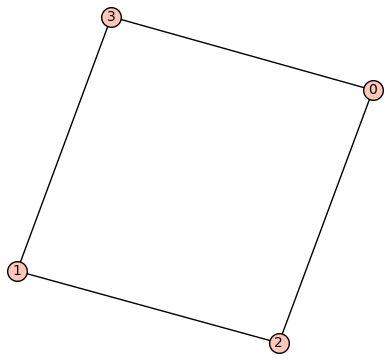

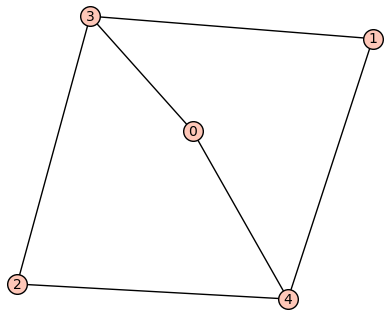

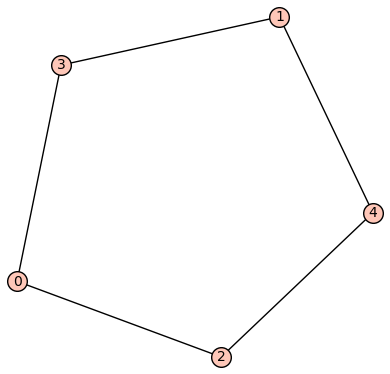

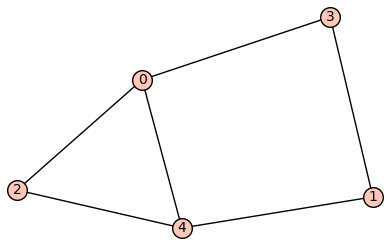

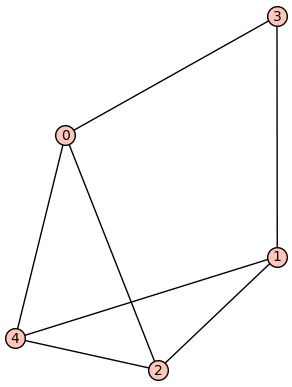

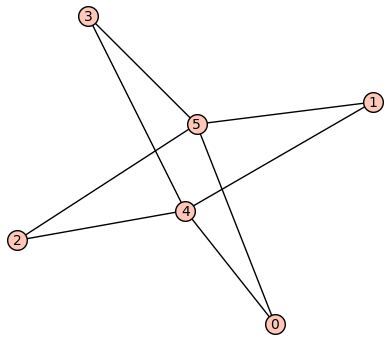

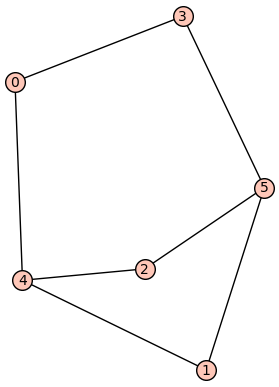

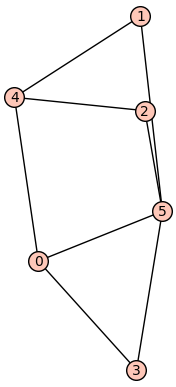

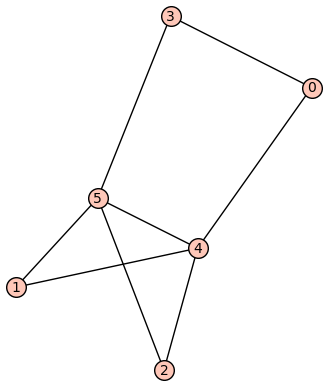

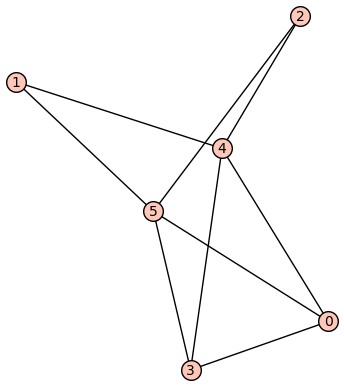

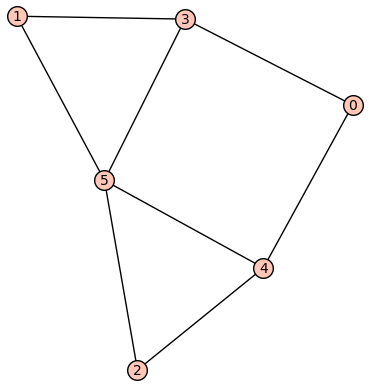

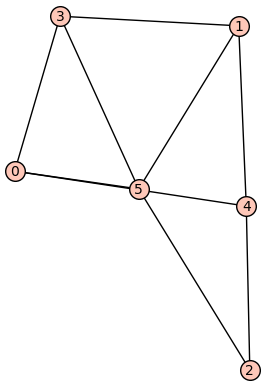

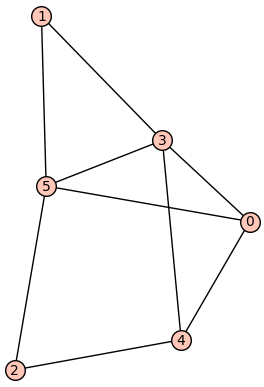

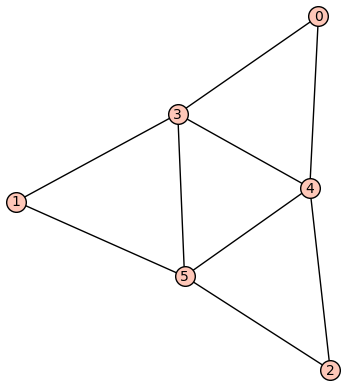

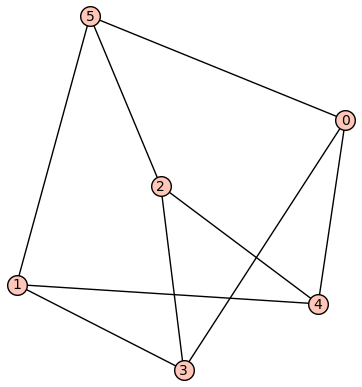

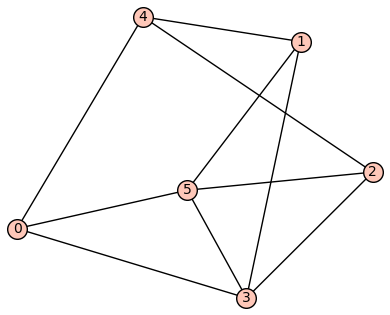

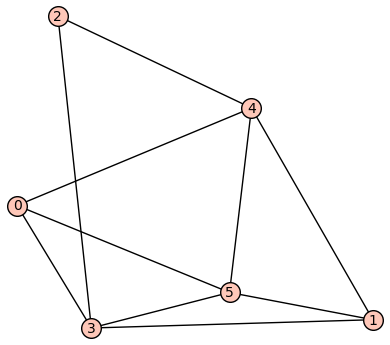

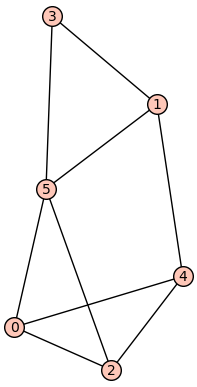

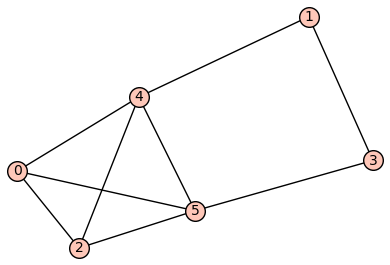

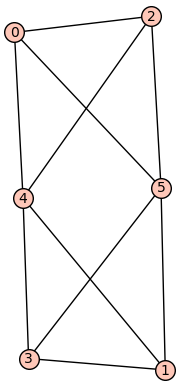

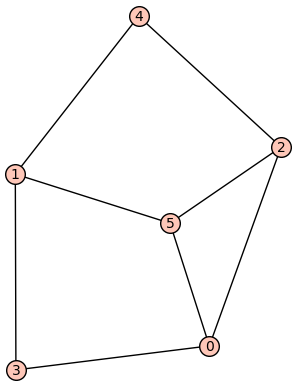

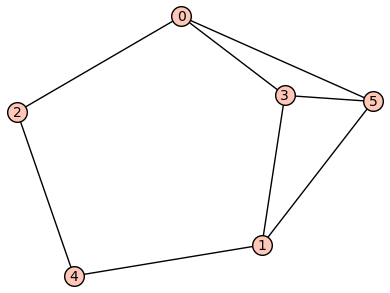

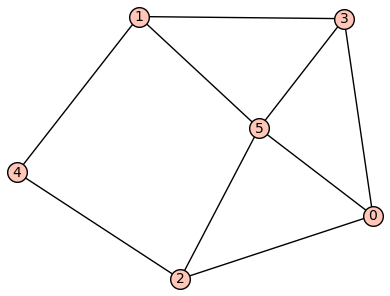

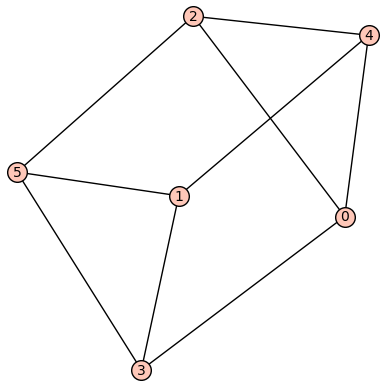

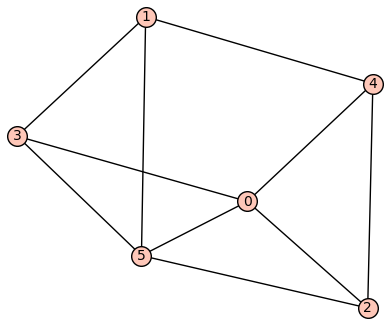

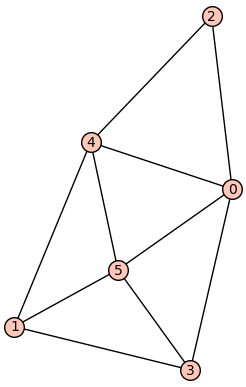

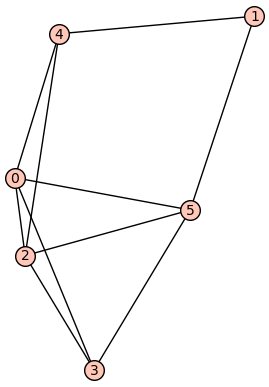

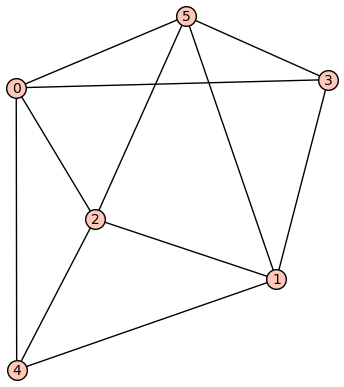

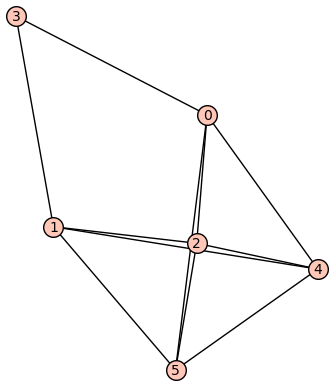

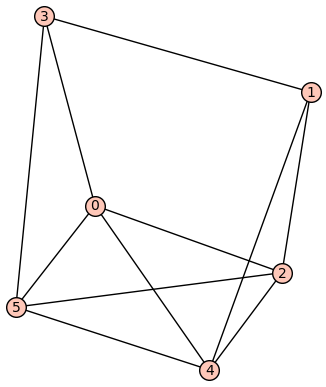

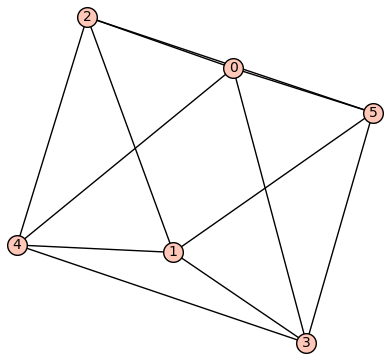

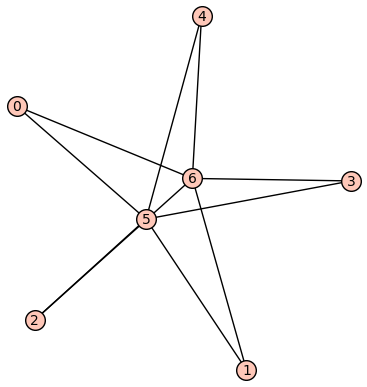

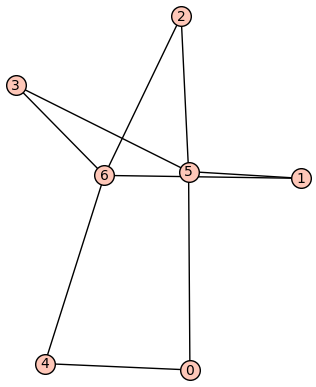

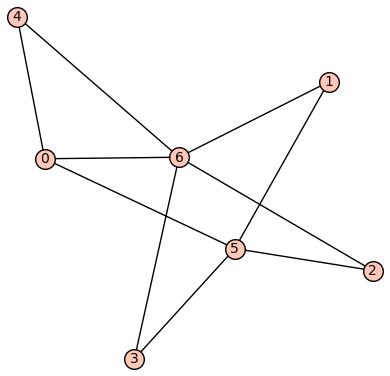

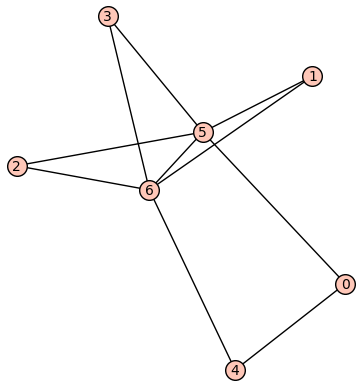

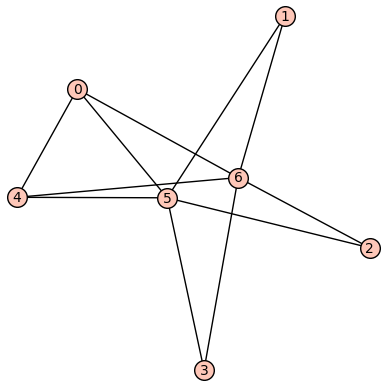

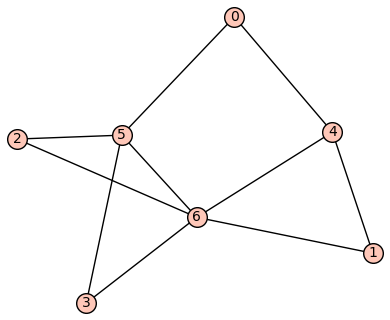

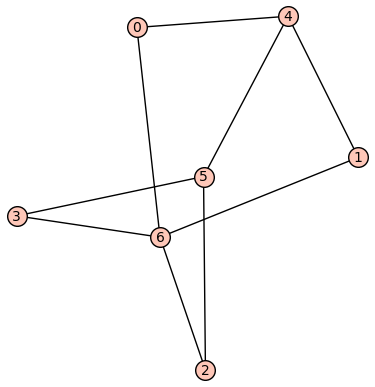

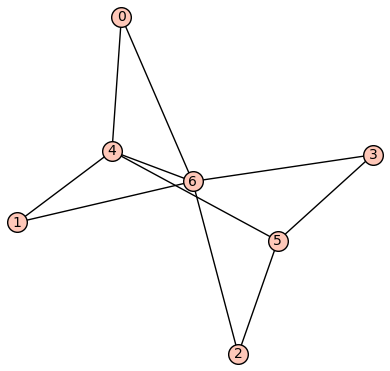

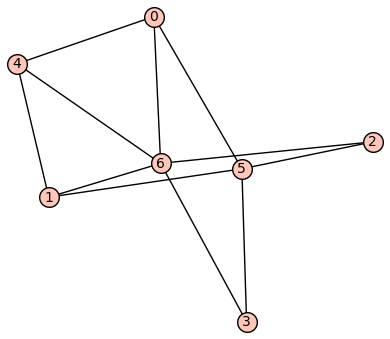

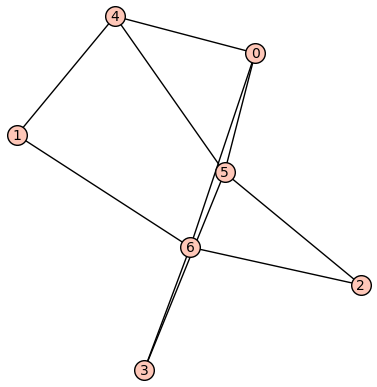

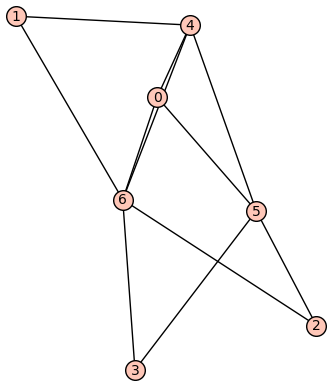

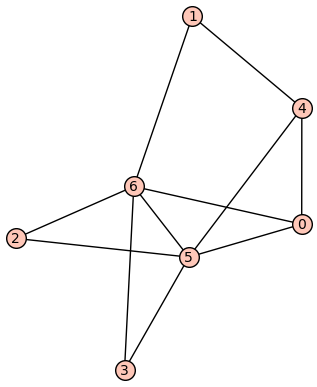

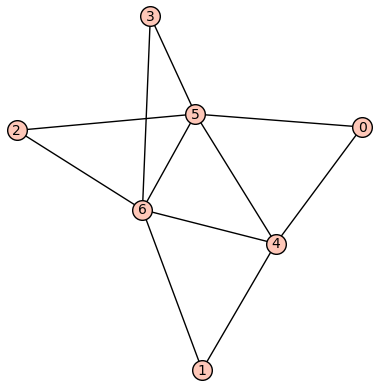

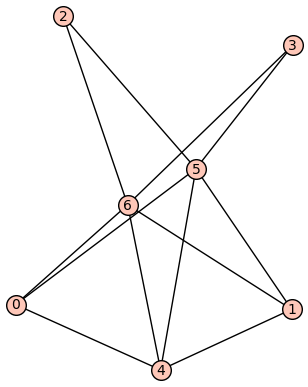

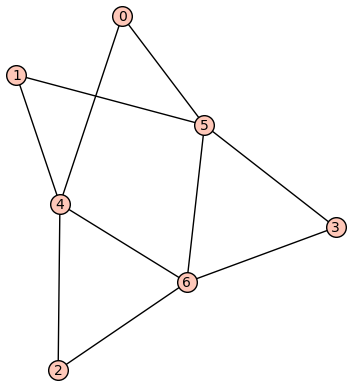

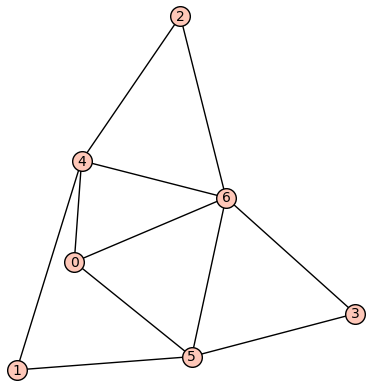

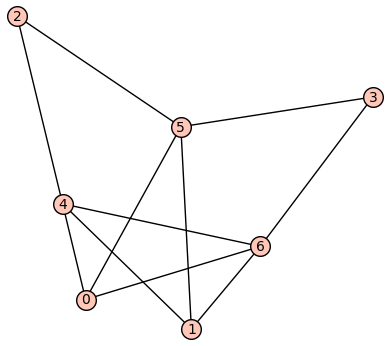

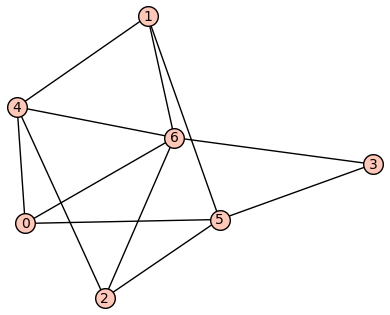

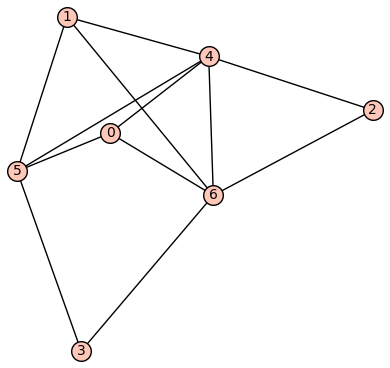

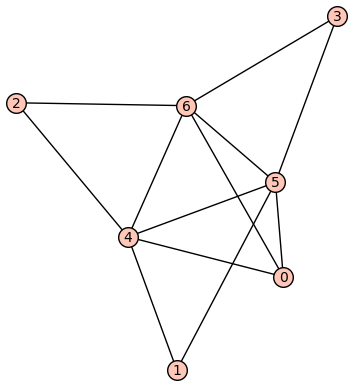

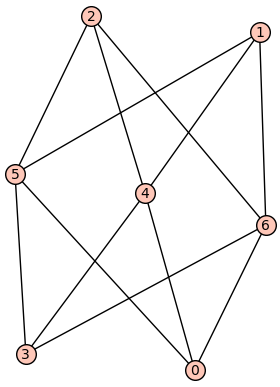

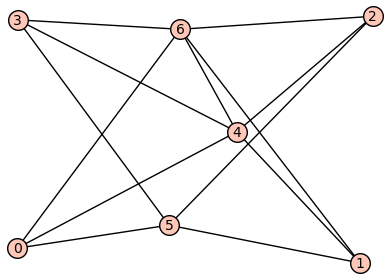

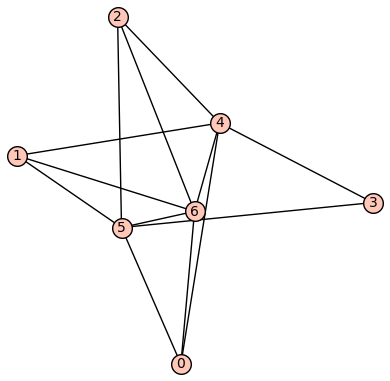

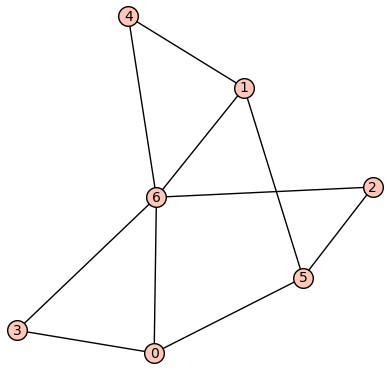

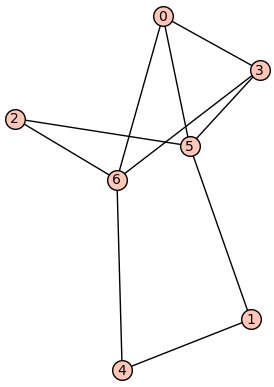

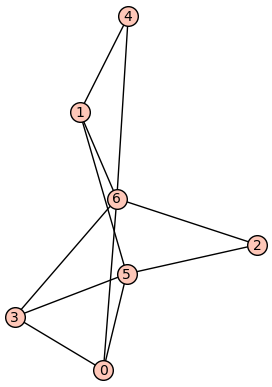

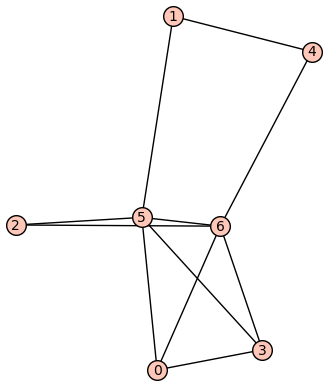

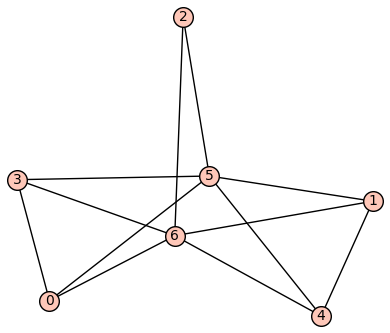

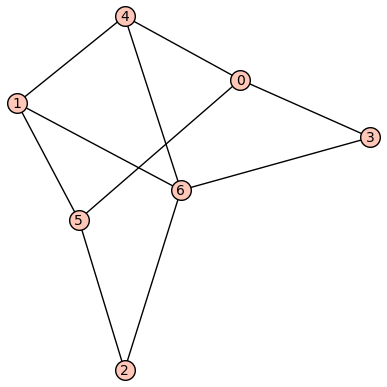

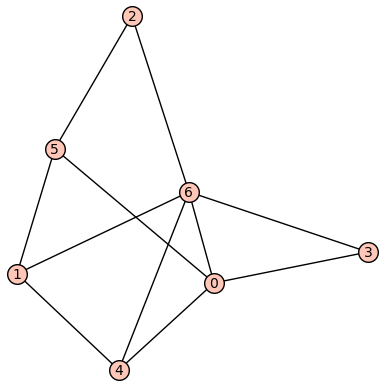

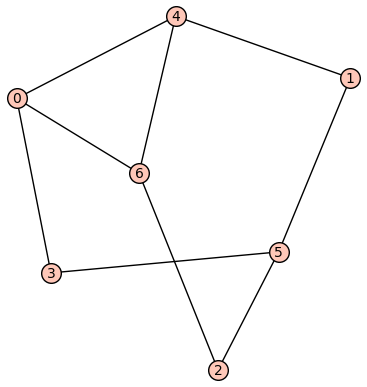

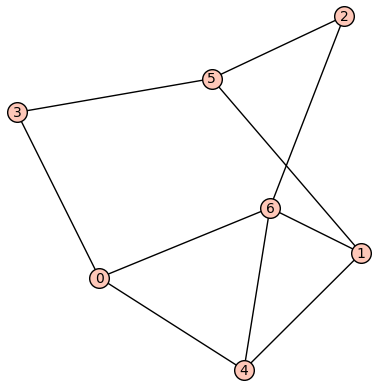

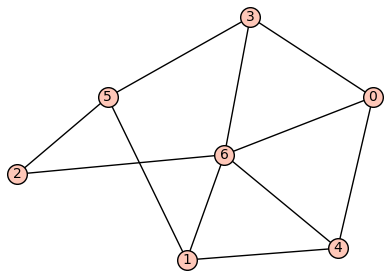

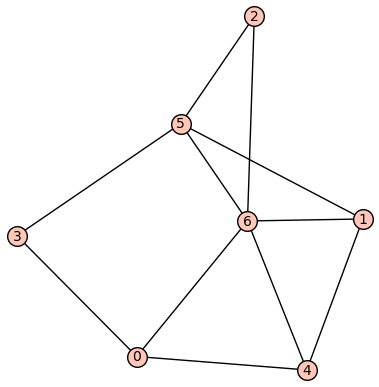

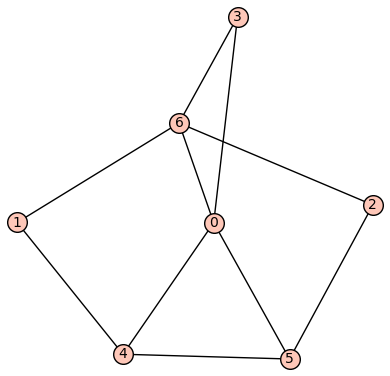

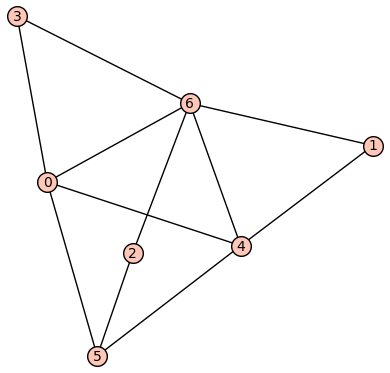

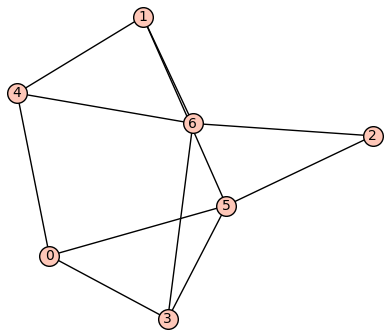

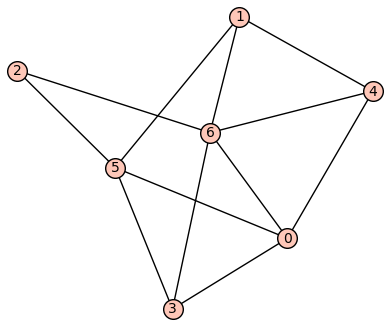

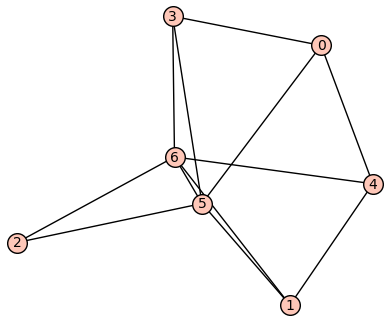

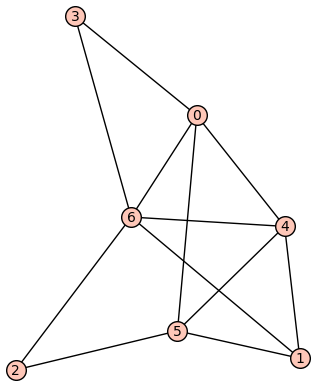

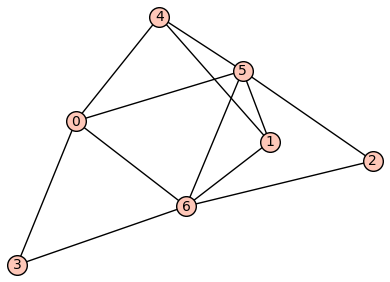

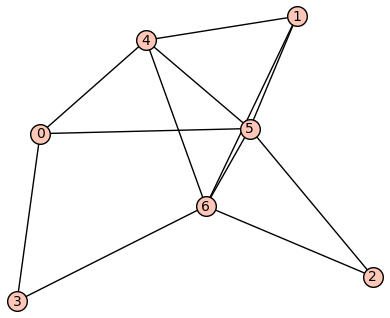

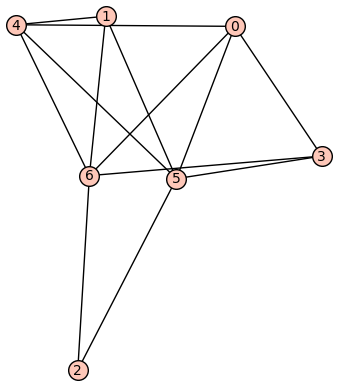

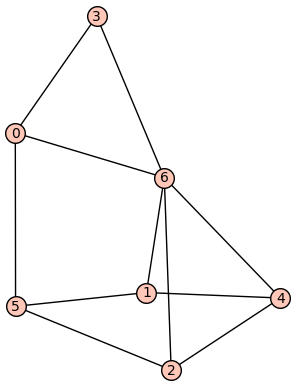

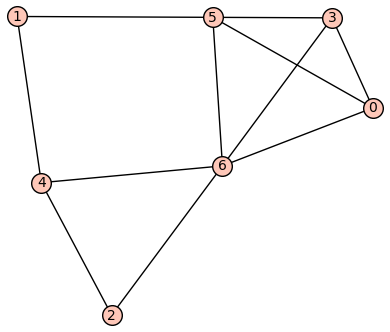

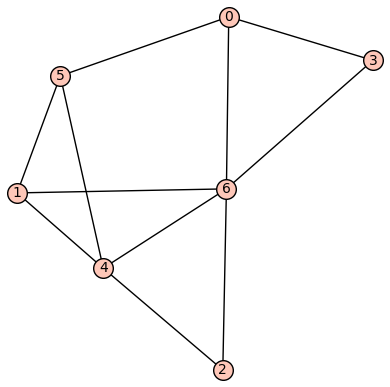

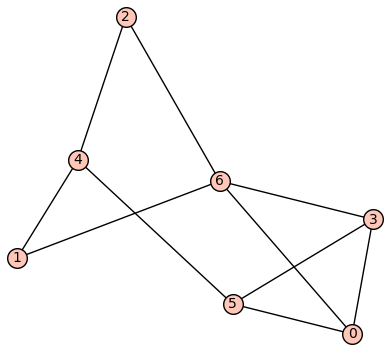

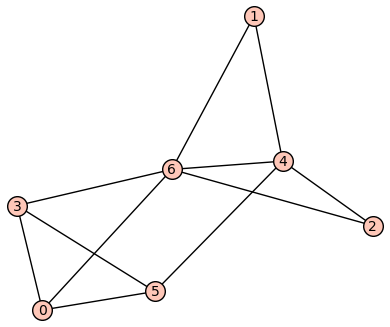

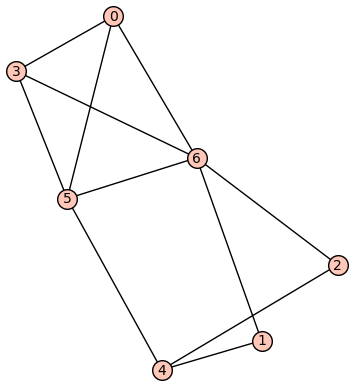

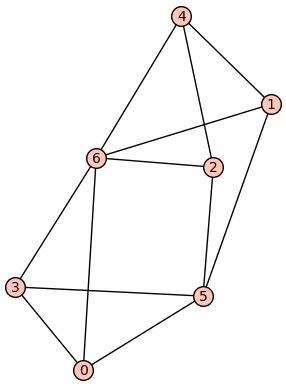

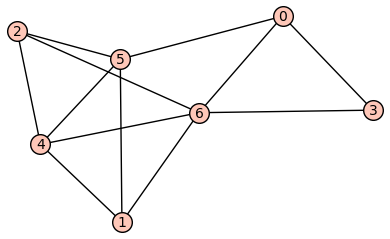

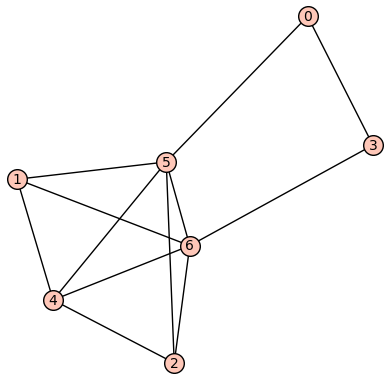

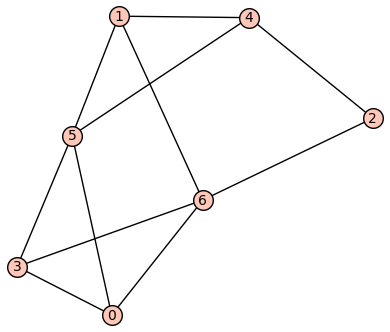

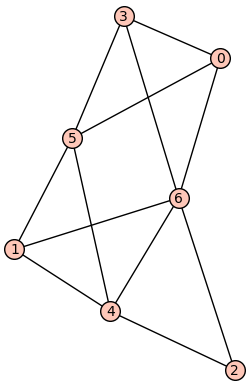

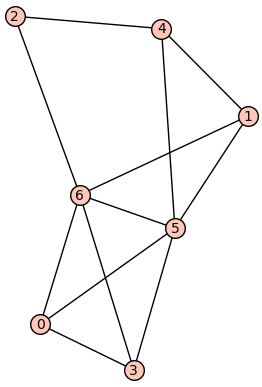

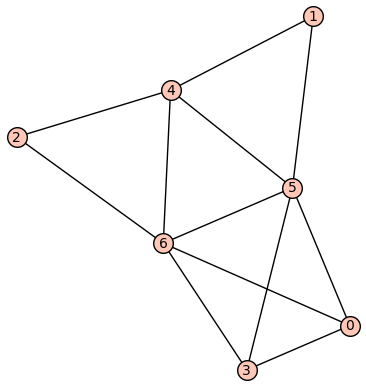

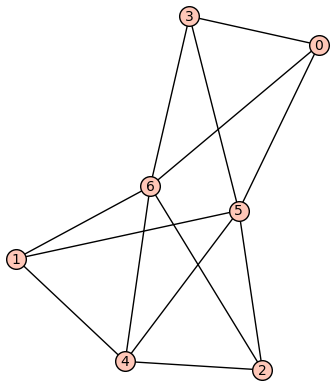

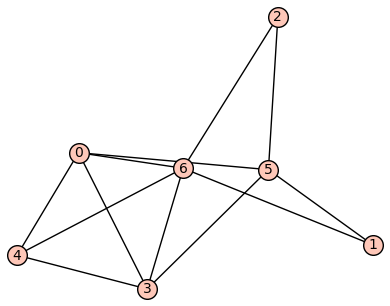

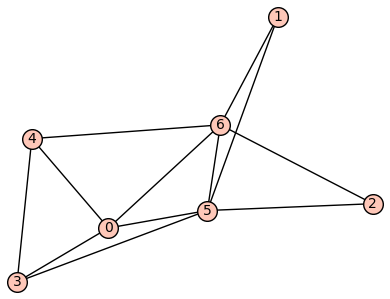

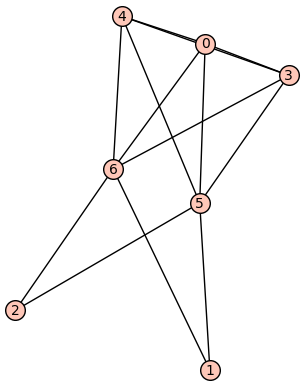

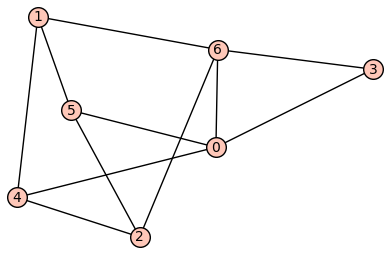

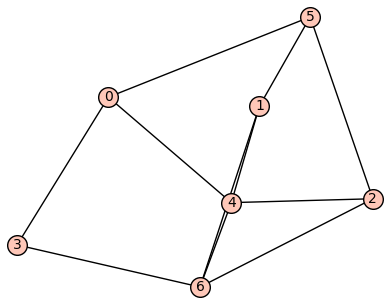

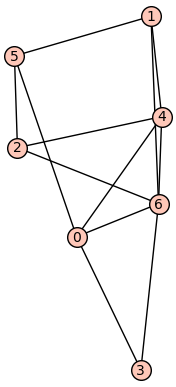

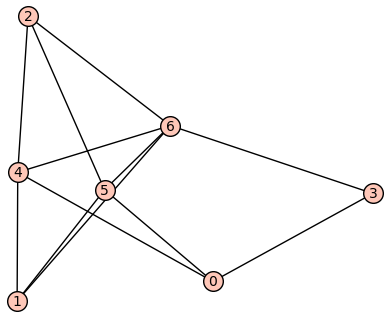

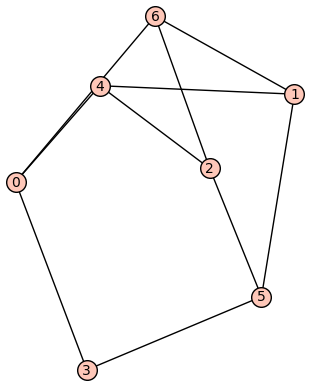

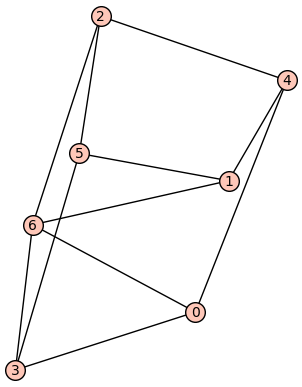

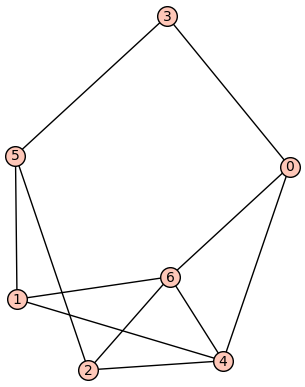

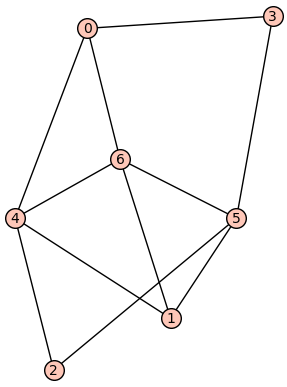

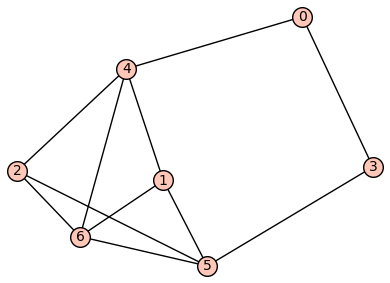

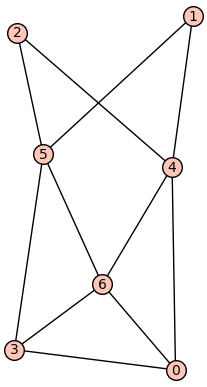

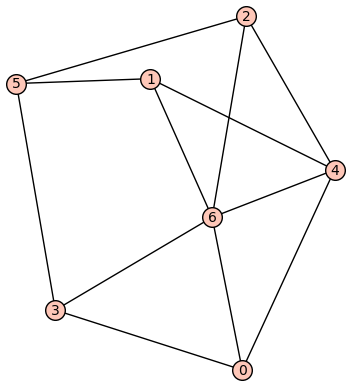

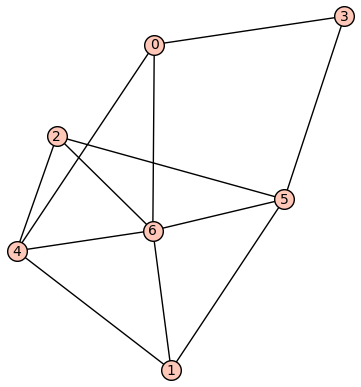

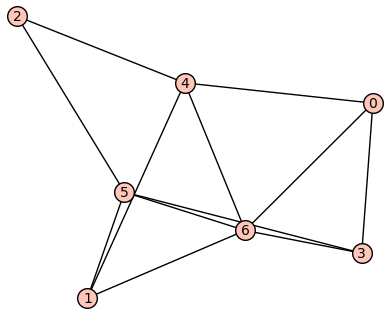

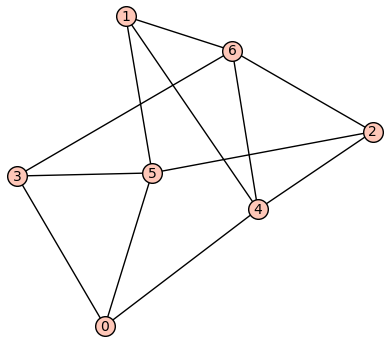

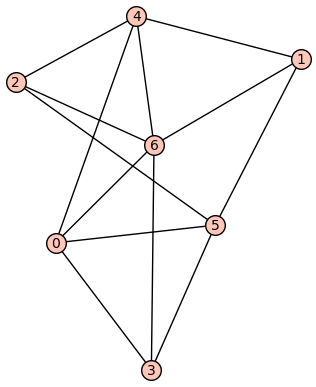

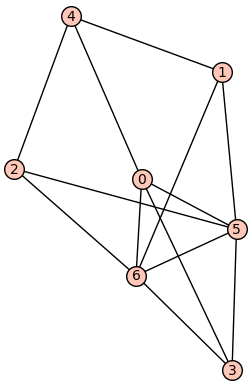

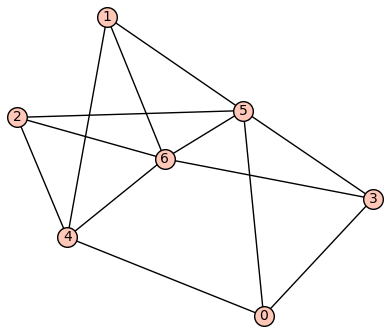

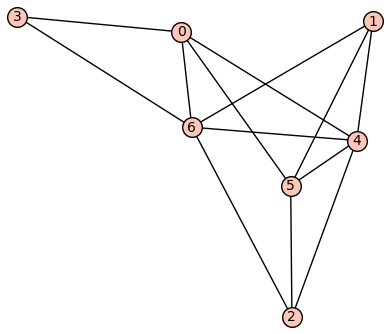

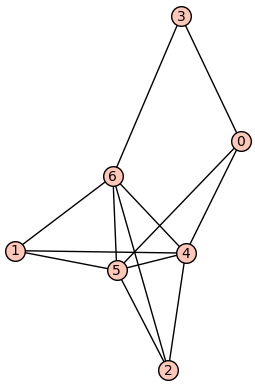

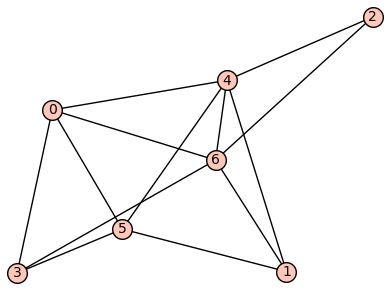

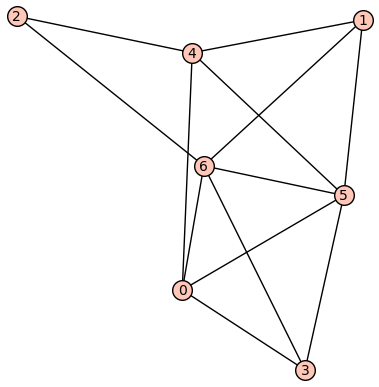

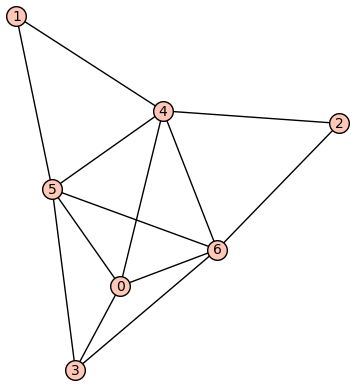

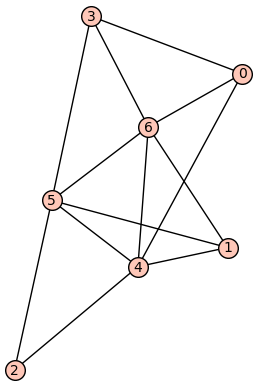

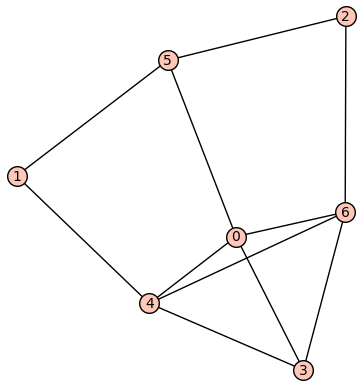

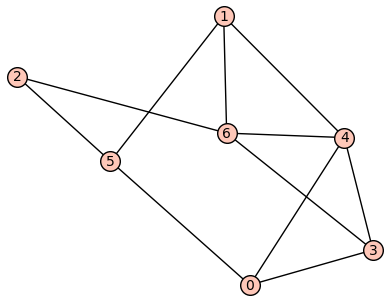

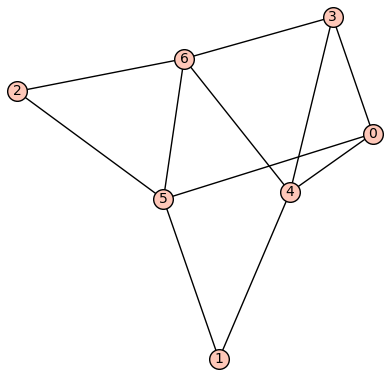

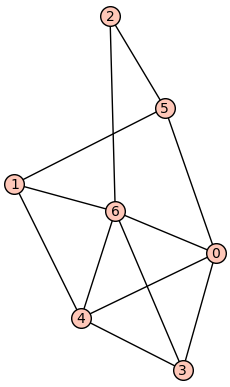

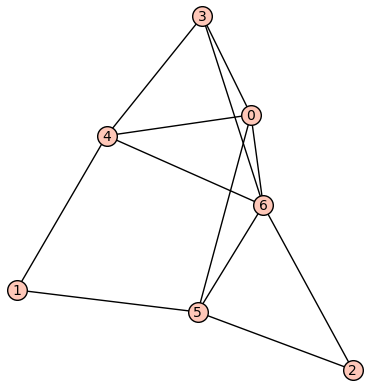

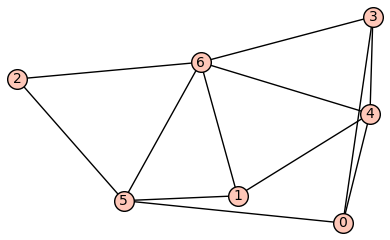

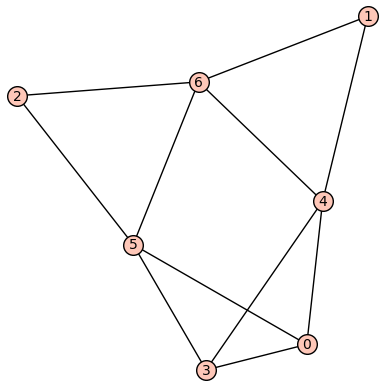

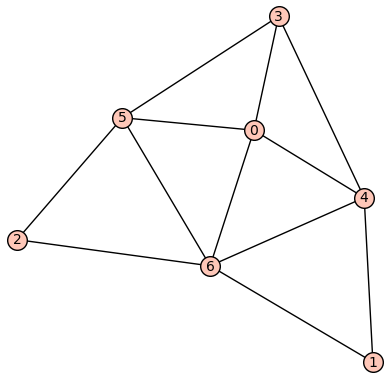

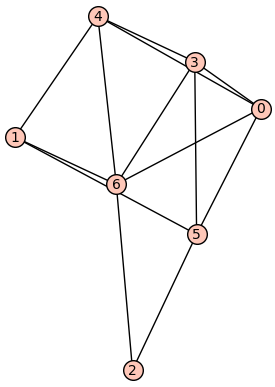

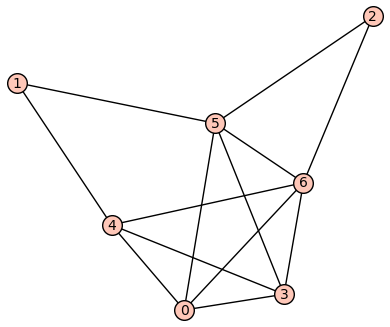

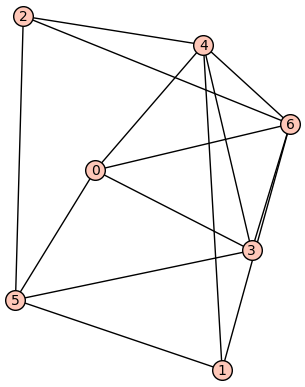

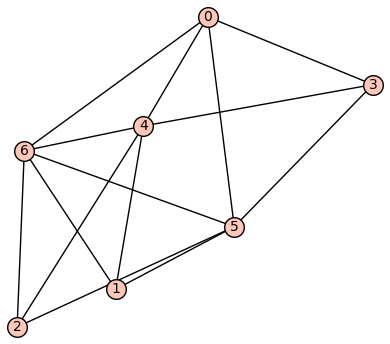

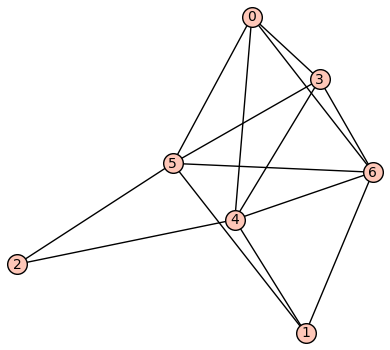

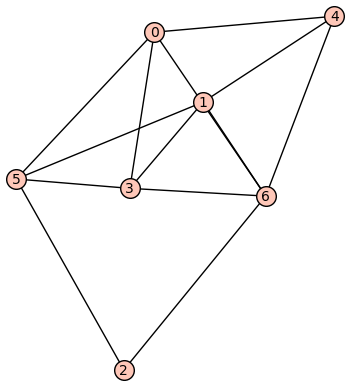

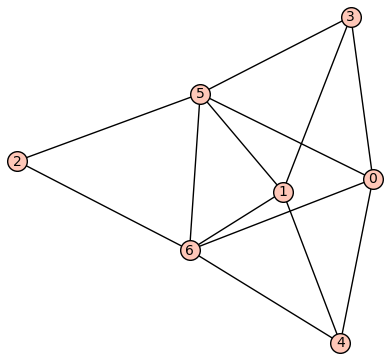

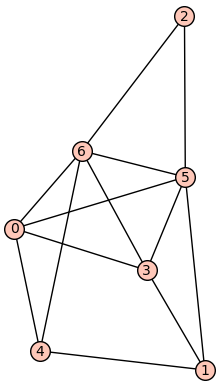

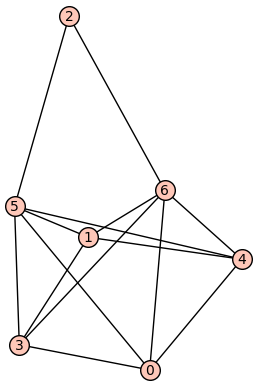

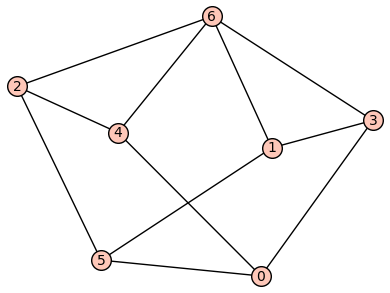

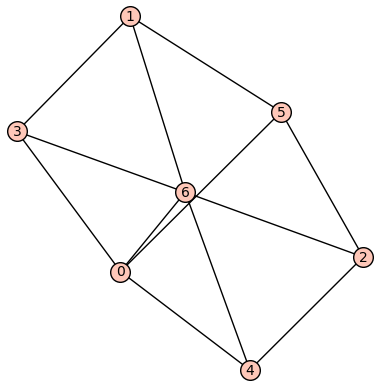

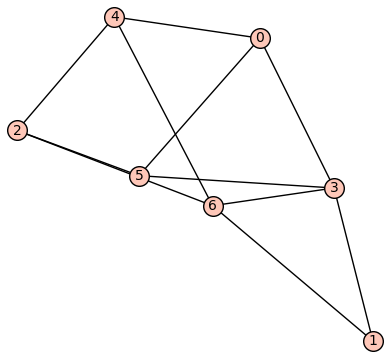

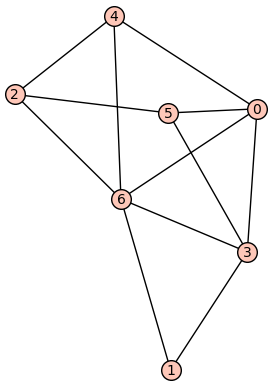

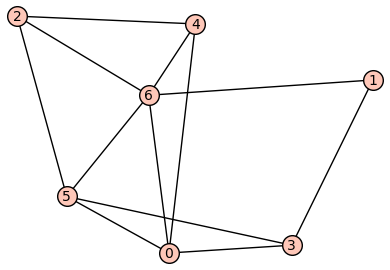

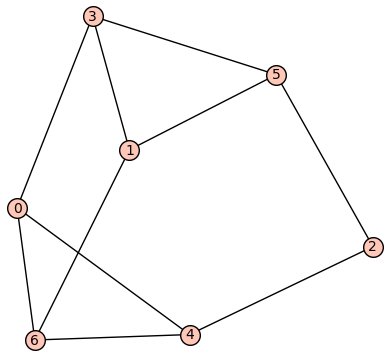

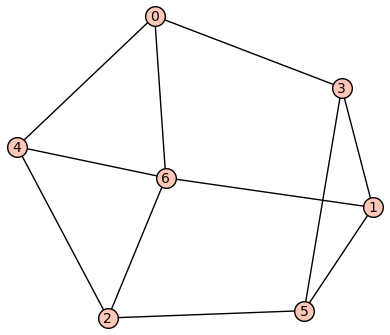

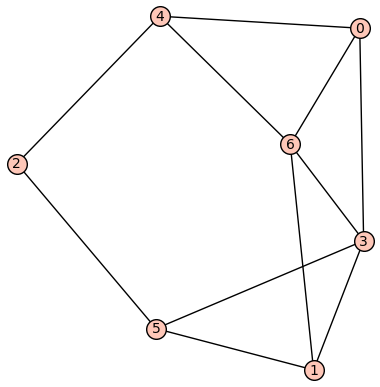

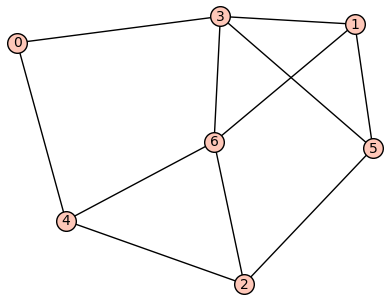

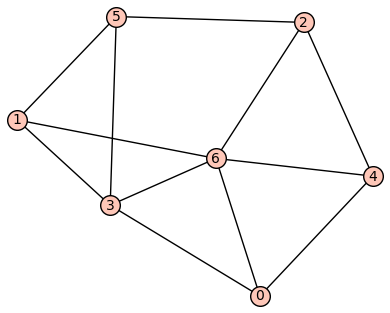

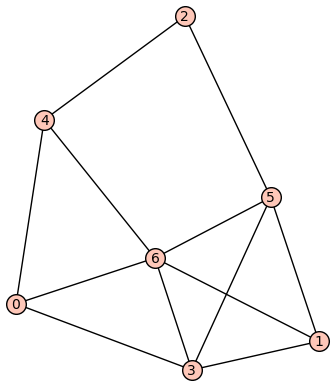

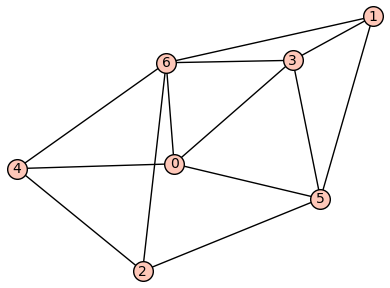

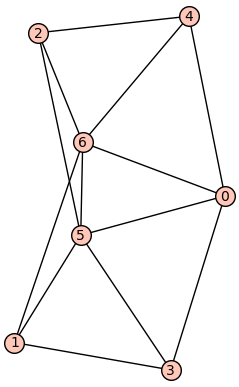

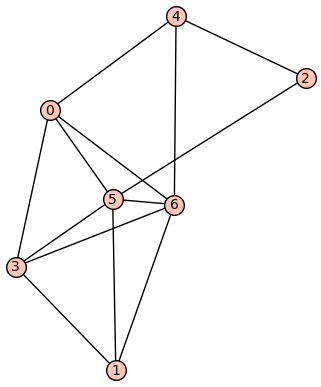

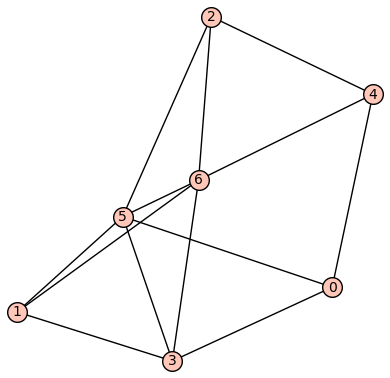

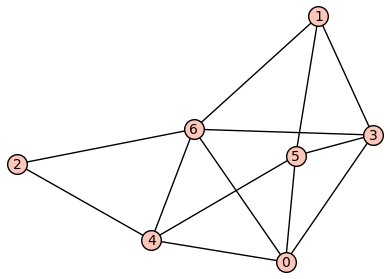

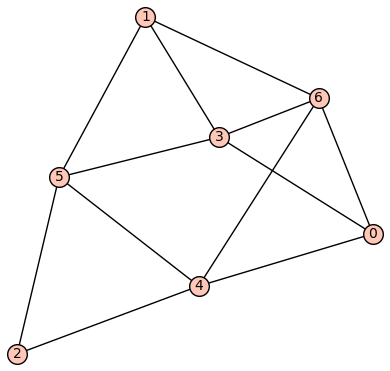

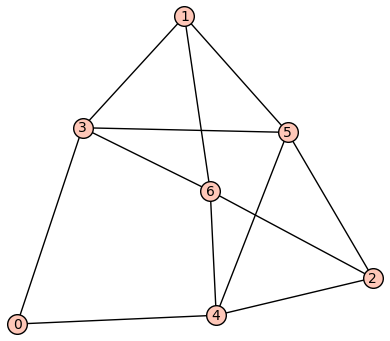

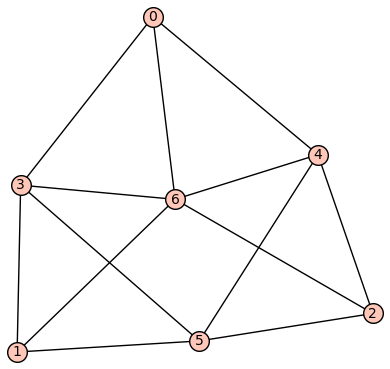

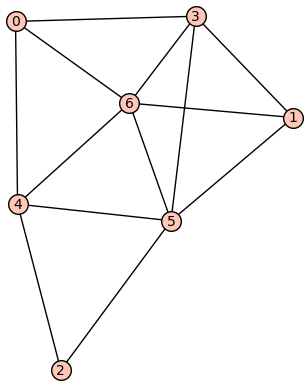

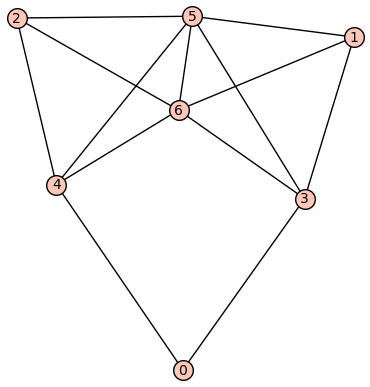

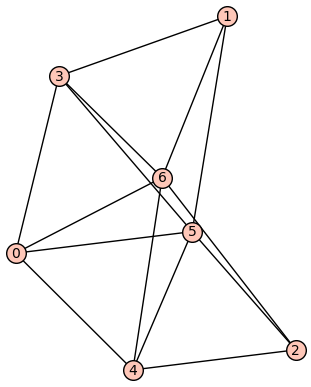

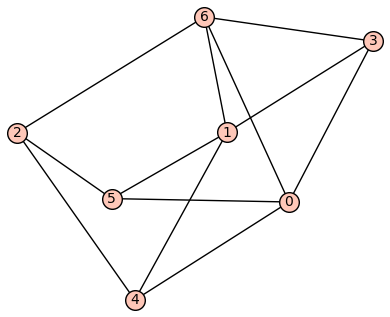

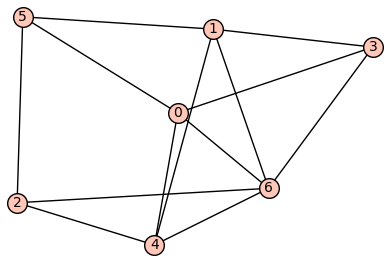

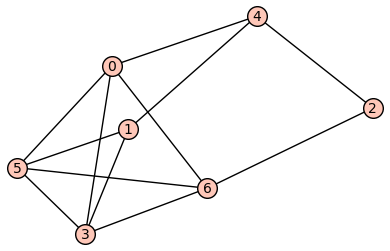

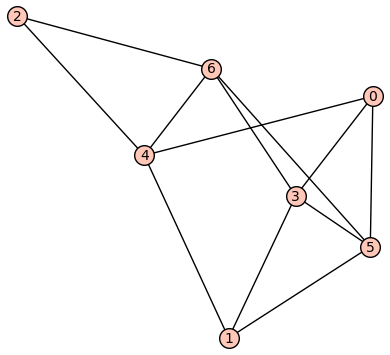

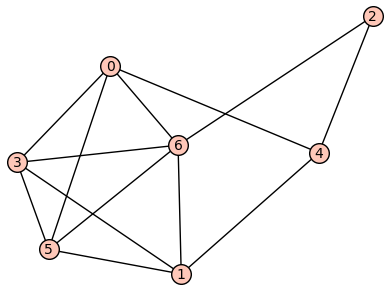

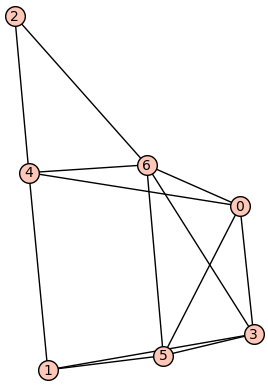

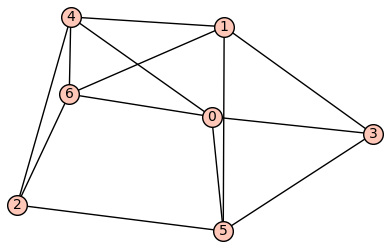

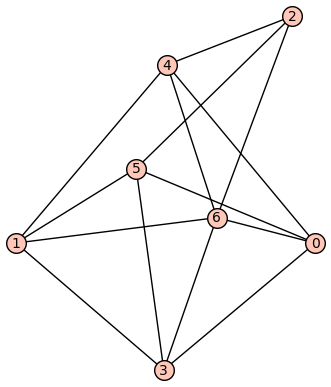

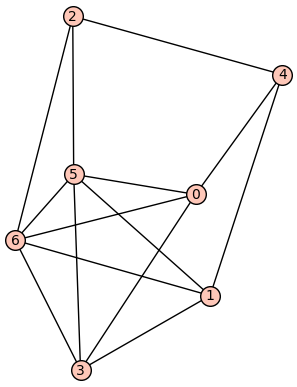

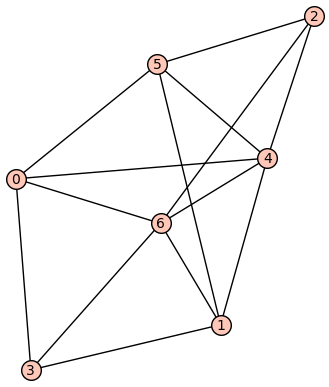

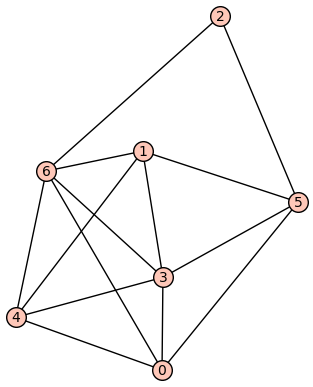

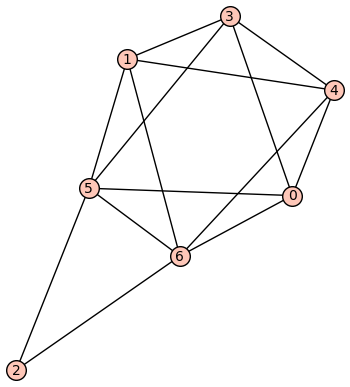

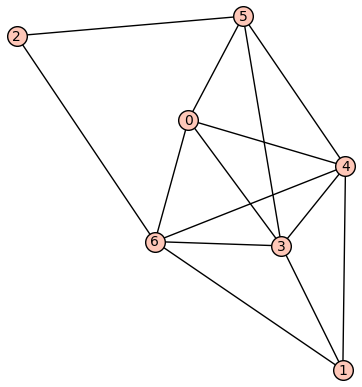

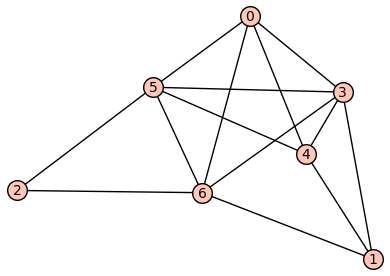

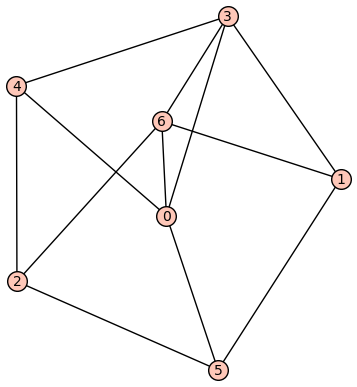

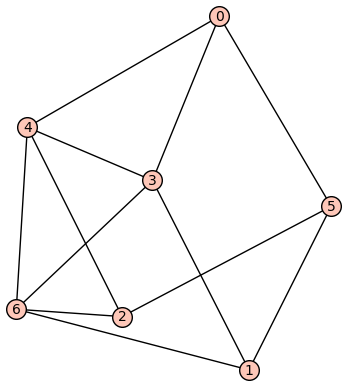

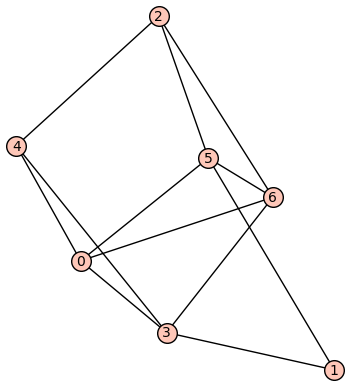

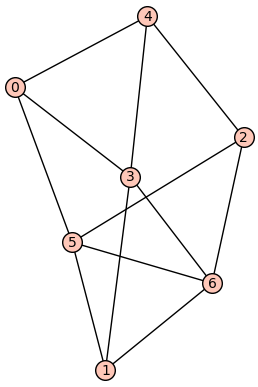

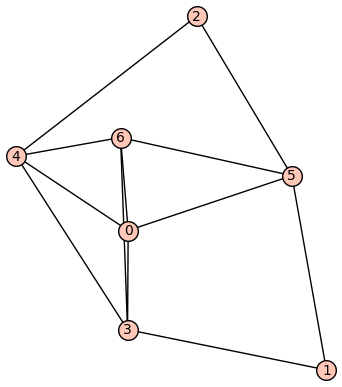

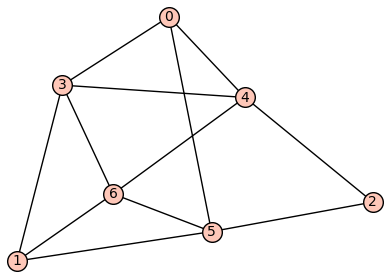

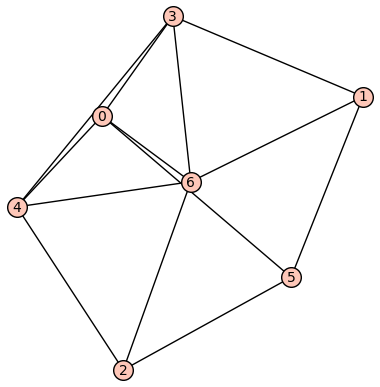

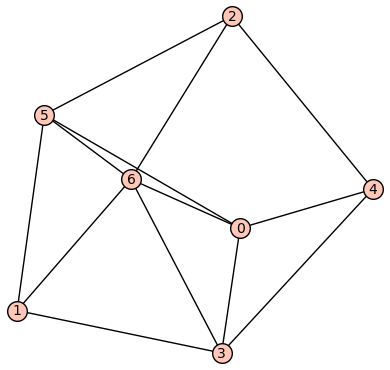

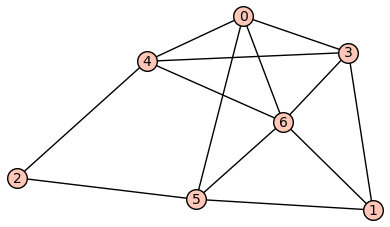

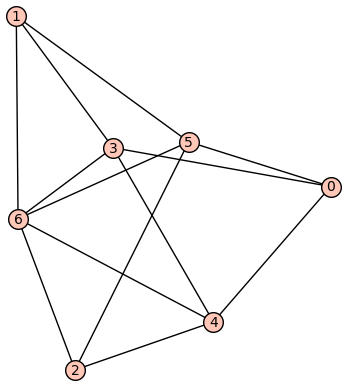

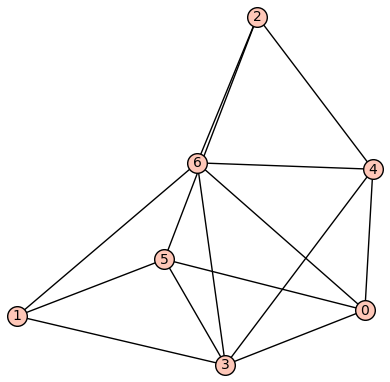

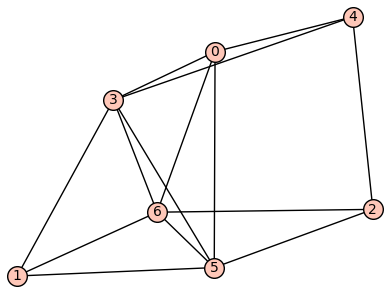

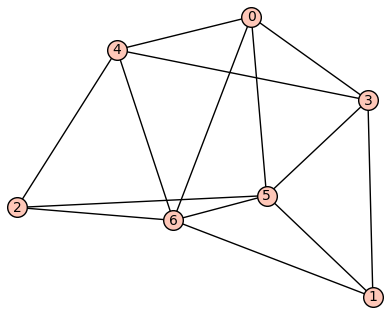

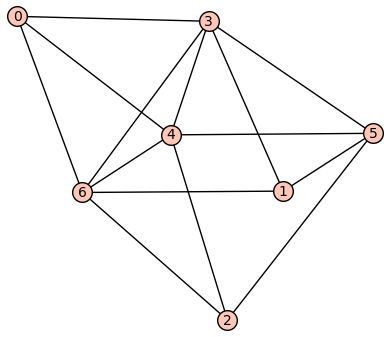

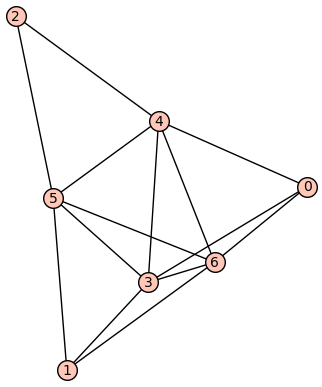

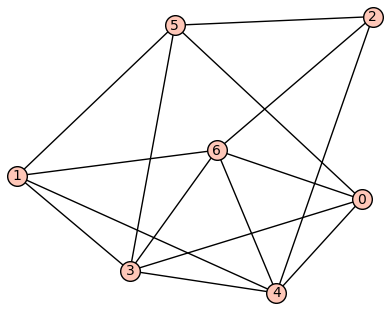

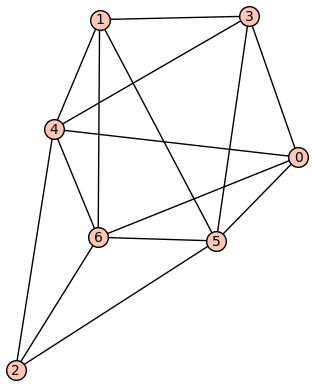

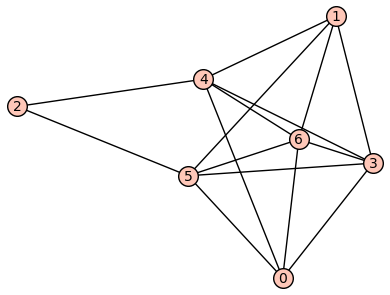

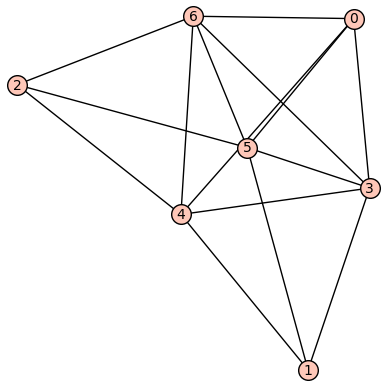

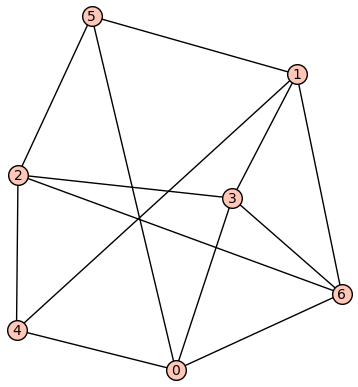

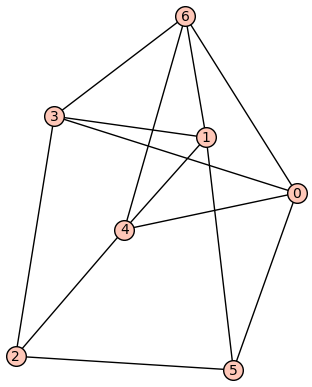

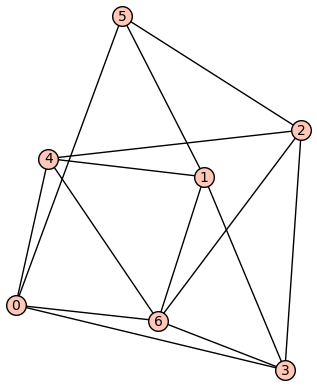

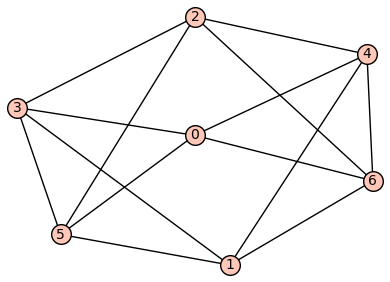

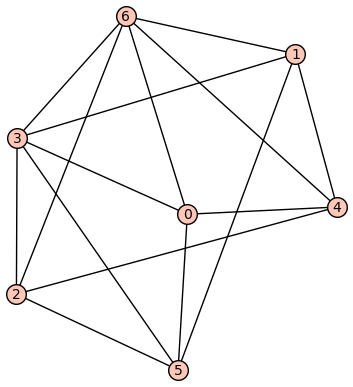

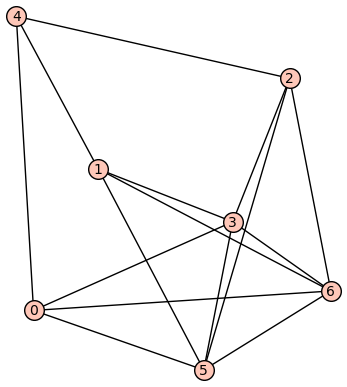

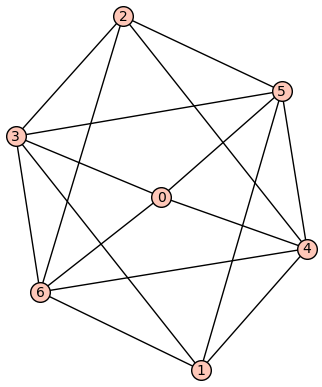

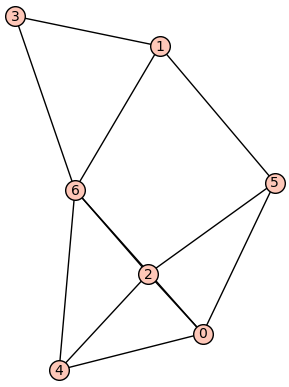

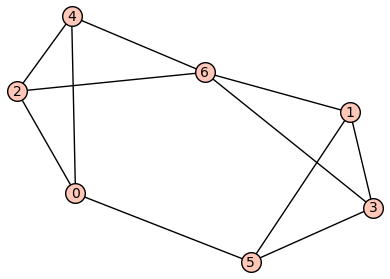

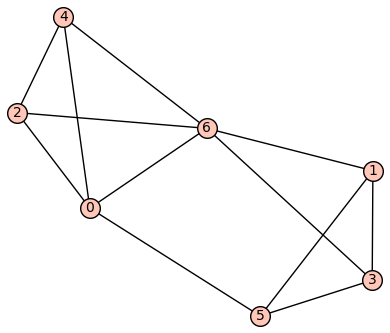

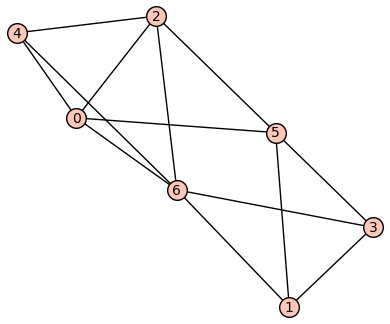

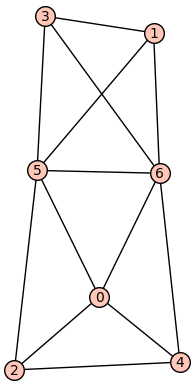

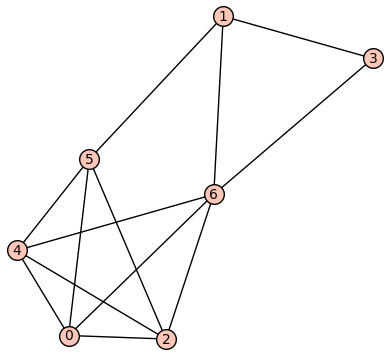

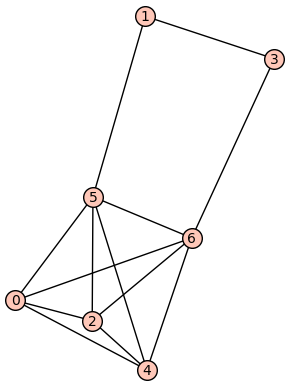

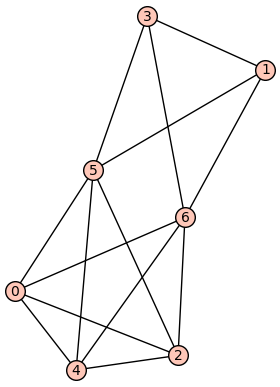

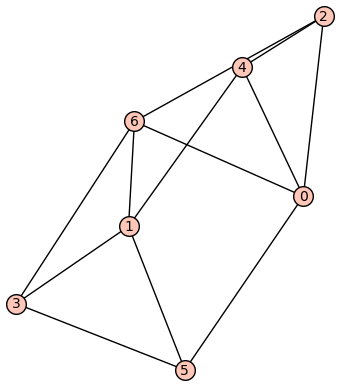

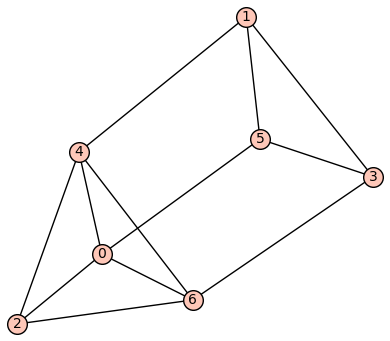

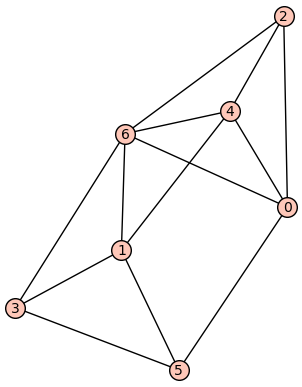

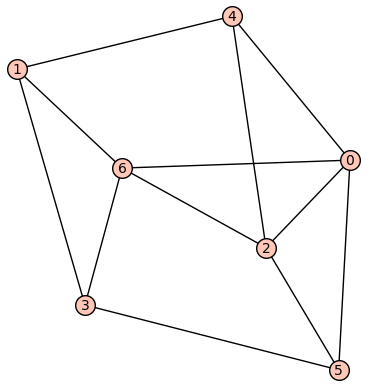

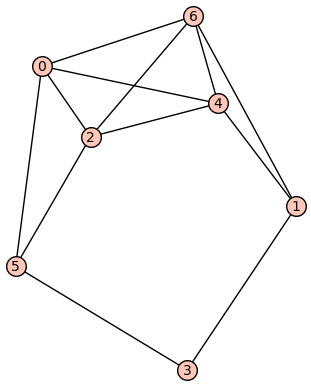

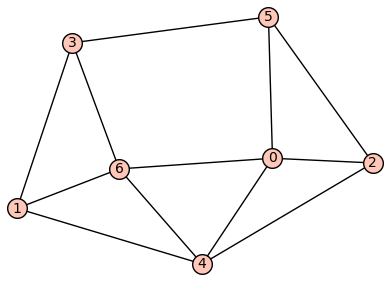

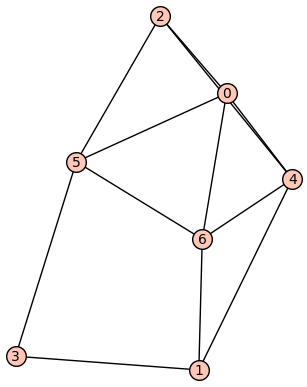

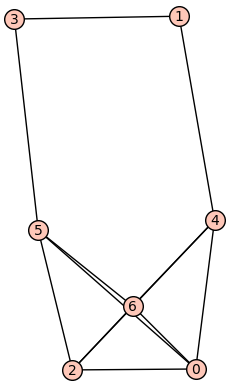

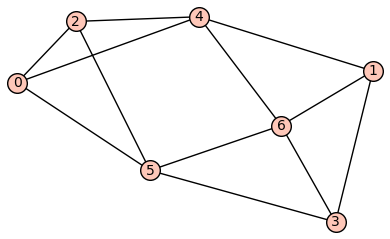

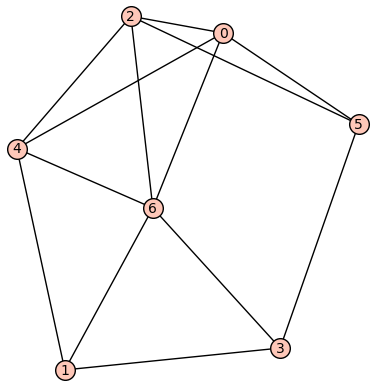

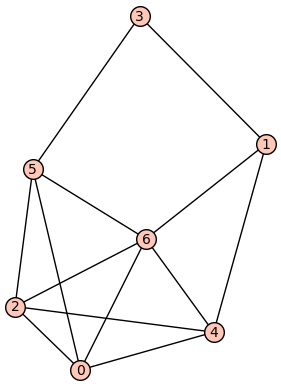

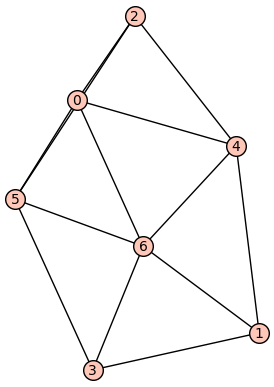

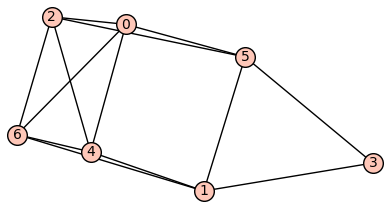

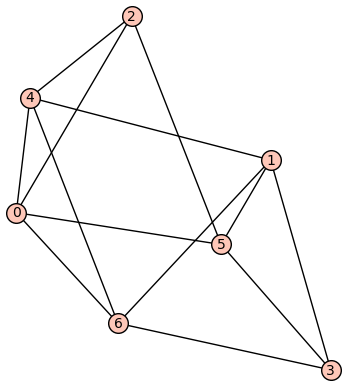

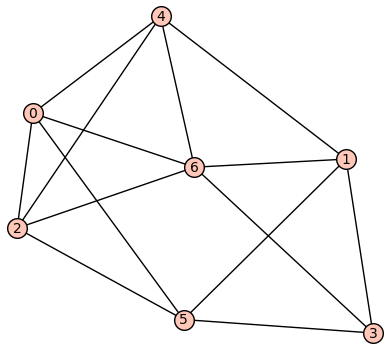

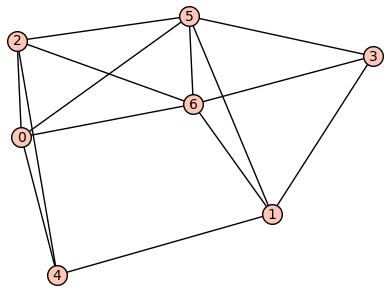

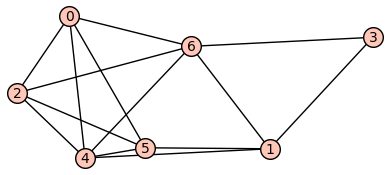

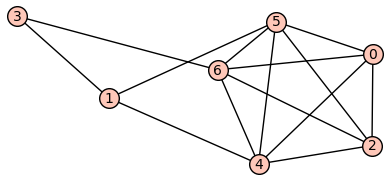

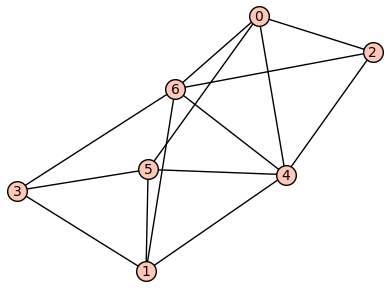

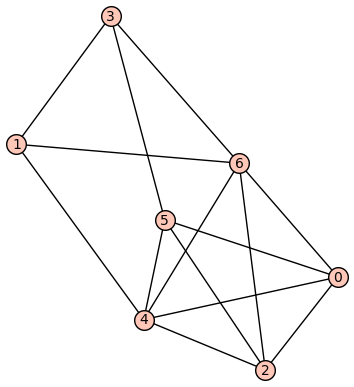

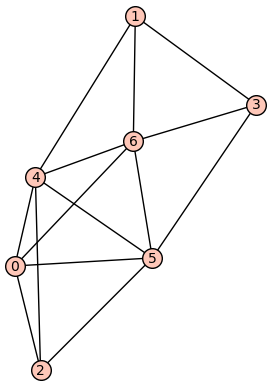

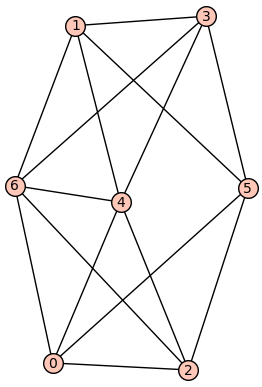

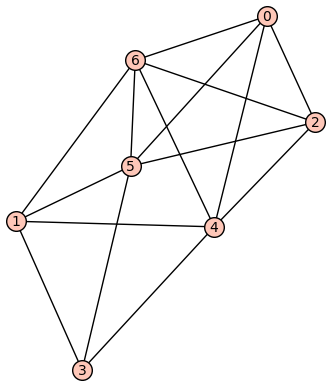

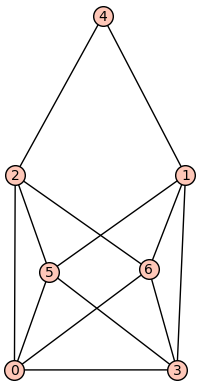

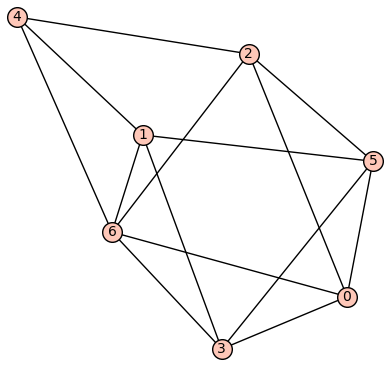

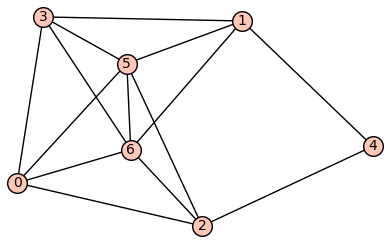

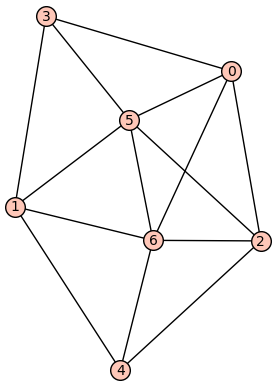

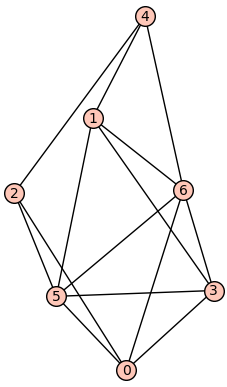

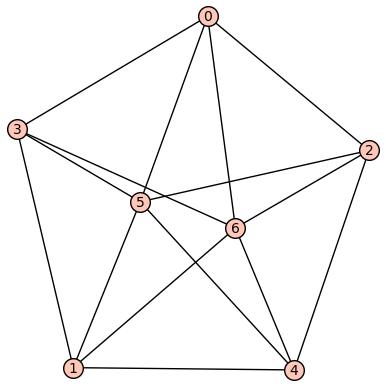

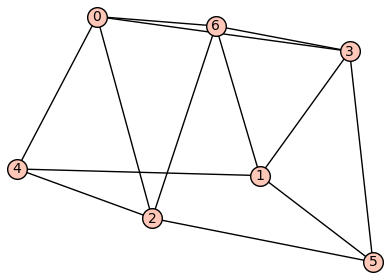

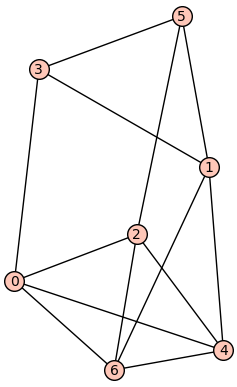

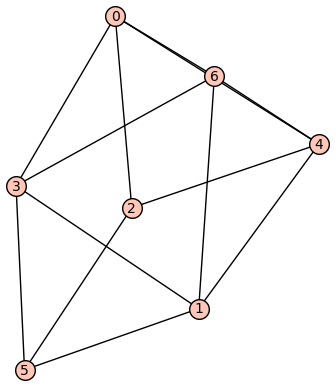

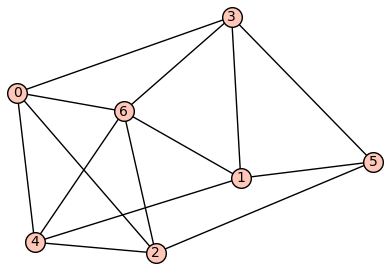

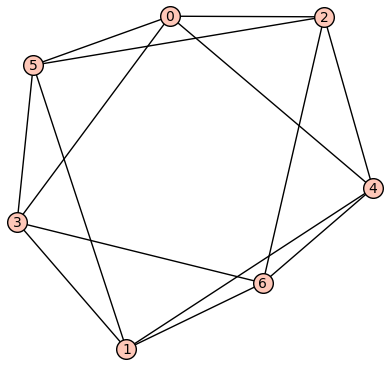

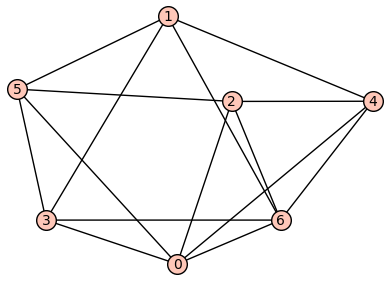

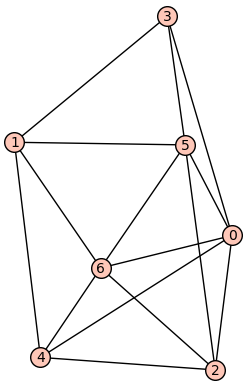

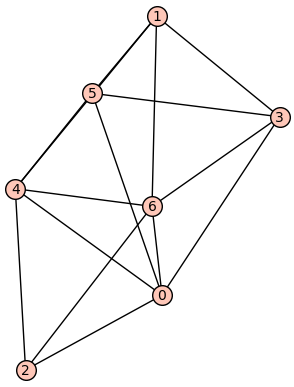

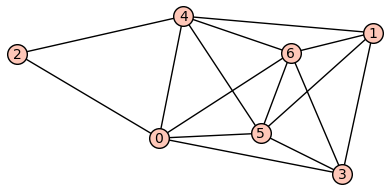

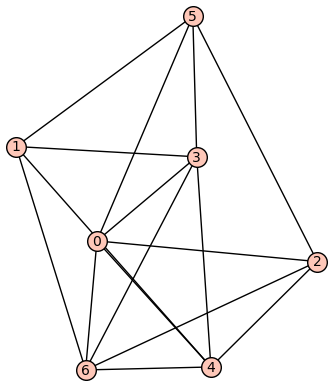

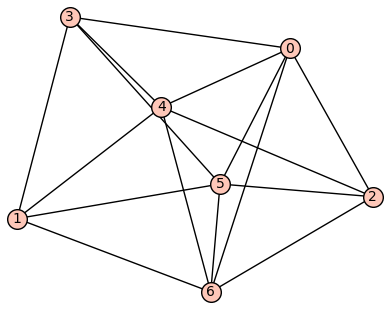

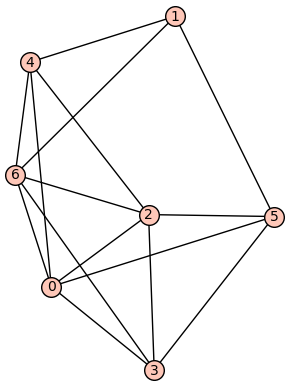

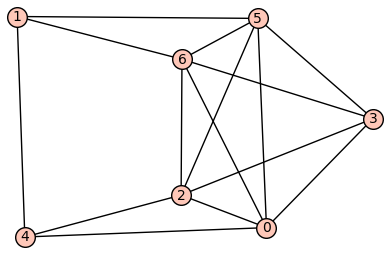

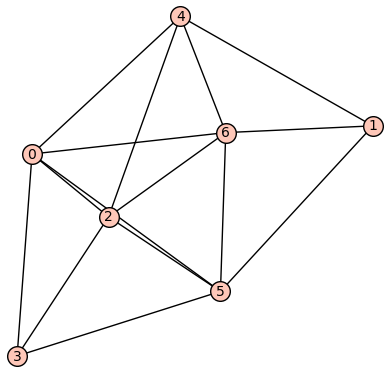

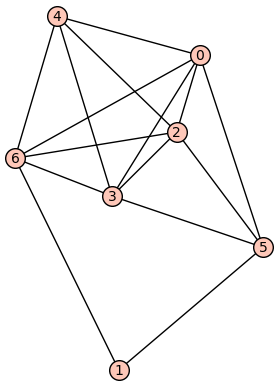

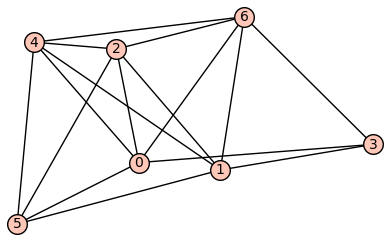

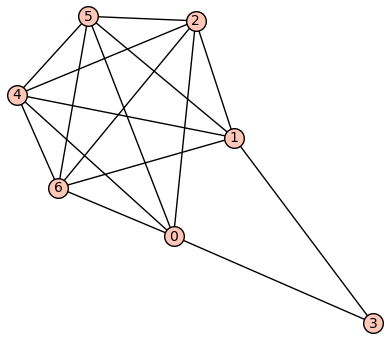

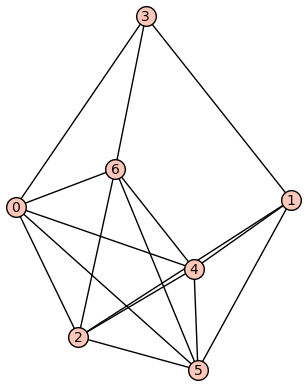

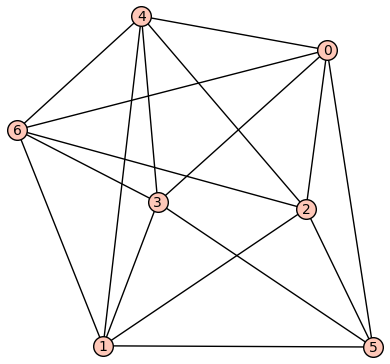

Tabela lastnosti grafov:
Št. vozlišč    STCTD stevilo
----------------------------------------
4              4         
5              4         
5              3         
5              3         
5              4         
6              4         
6              3         
6              3         
6              4         
6              4         
6              3         
6              3         
6              3         
6              3         
6              4         
6              4         
6              4         
6              3         
6              3         
6              4         
6              3         
6              3         
6              3         
6              4         
6              4         
6              3         
6              3         
6              4         
6              4         
6              4         
6              6         
7              4         
7              3         
7              3         
7              4     

In [4]:
# naključno generiramo majhne grafe velikosti s 3 do 7 vozlišči; samo take, ki nimajo največje stopnje enake n -1,
# saj v tem primeru komplement grafa vsebuje izolirane točke in število je enako 0

import random


grafi = []


for i in range(3, 8):
    for G in graphs.nauty_geng(f'{i} -c'):  
        grafi.append(G)
nov_graf = []

for graf in grafi:
    if graf.diameter() == 2 and max(graf.degree()) != graf.num_verts() - 1:
        graf.show()
        nov_graf.append(graf)
    continue
    
    
tabela = []
for graf in nov_graf:
    vrstica = {
        "Število vozlišč": graf.order(),  # Število vozlišč
        "STCTD stevilo": SDCTD_stevilo(graf)
    }
    tabela.append(vrstica)

print("Tabela lastnosti grafov:")
print(f"{'Št. vozlišč':<15}{'STCTD stevilo':<10}")
print("-" * 40)
for vrstica in tabela:
    print(f"{vrstica['Število vozlišč']:<15}{vrstica['STCTD stevilo']:<10}")
    

In [5]:
# preverimo, kakšen je max/min za grafe z določenim številom vozlišč

import pandas as pd


df = pd.DataFrame(tabela)

# Poiščemo maksimum in minimum za vsak unikatni element na levi

result = df.groupby("Število vozlišč")["STCTD stevilo"].agg(["max", "min"]).reset_index()

print(result)

   Število vozlišč max min
0                4   4   4
1                5   4   3
2                6   6   3
3                7   6   3


Opazimo lahko, da je v vseh primerih minimum enak 3, razen za vozlišča s štirimi vozlišči. Edini graf z diametrom 2 in 4 vozlišči je 4\-cikel in njegovo SDCTD število je maksimalno. Opazimo še, da je poseben tudi 4\-regularen graf na 6 vozliščih. Sicer je število povsod enako 3 ali 4. Manj ne more biti. Če iskano število zapišemo kot vsoto dominacijskega števila grafa in totalnega dominacijskega števila njegovega komplementa, prva komponenta je vedno vsaj 1, druga pa vedno vsaj 2. Iz tega sledi, da je vsota vedno vsaj 3.



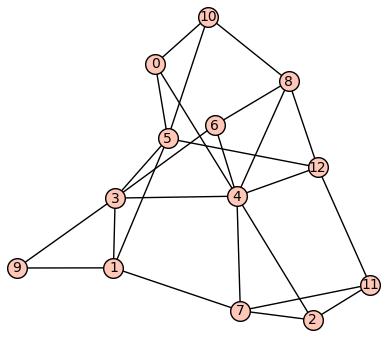

3


In [6]:
# sedaj poglejmo kako se to število obnaša za velike grafe; recimo da preverjamo grafe, ki imajo nad 13 vozlišč
# implementiramo najprej random graf na 13 vozliščih; nato postopoma odstranjujemo/dodajamo povezave, da ga pretvorimo v takšnega z diametrom 2
# vozlišč ne spreminjamo, saj to zaplete proces!

random_13 = graphs.RandomGNP(13, 0.3) # ustvari naključen graf na 13 vozliščih z določeno verjetnostjo povezav
random_13.show()
print(random_13.diameter())

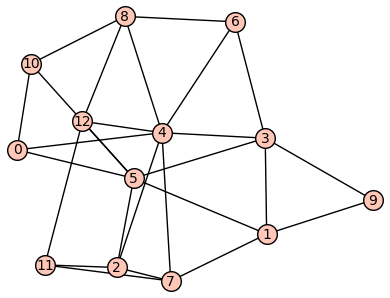

3


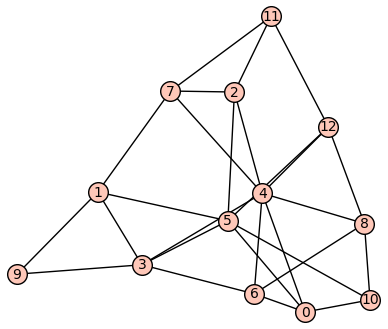

3


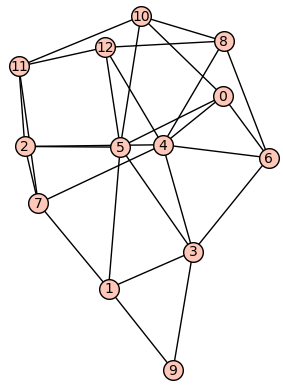

3


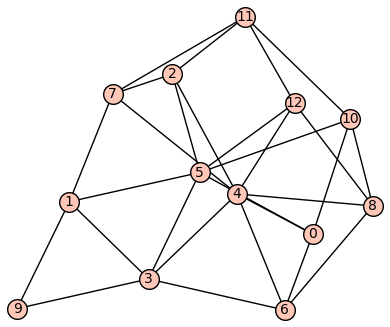

3


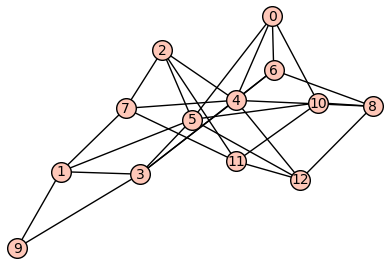

3


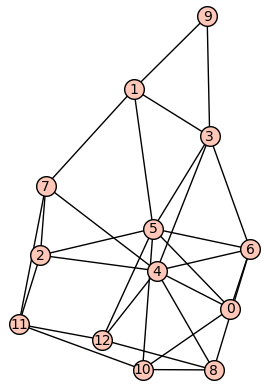

3


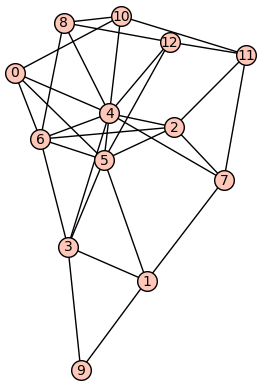

3


In [7]:
# dodamo povezavo in pogledamo, če se diameter spremeni; ročno
# to je samo eden od primerov; vedno mi vrže drug naključni graf

random_13.add_edge((2,5))
random_13.show()
print(random_13.diameter())

random_13.add_edge((0,6))
random_13.show()
print(random_13.diameter())

random_13.add_edge((10,11))
random_13.show()
print(random_13.diameter())

random_13.add_edge((2,11))
random_13.show()
print(random_13.diameter())

random_13.add_edge((7,2))
random_13.show()
print(random_13.diameter())

random_13.add_edge((5,6))
random_13.show()
print(random_13.diameter())

random_13.add_edge((2,6))
random_13.show()
print(random_13.diameter())



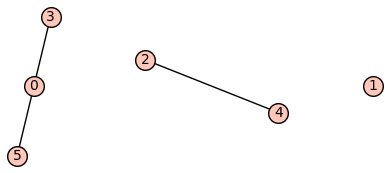

Trenutni premer: +Infinity
Premer je dosegel 2 z dodano povezavo: (0, 4)


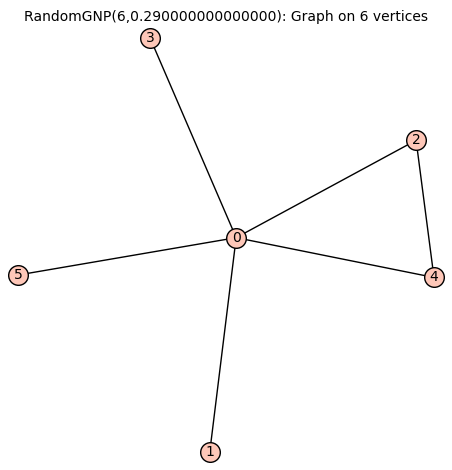

In [8]:
# zgornje iskanje povezav je zamudno, sploh za velike grafe, zato napišemo algoritem, ki je učinkovitejši

def find_best_edge_to_reduce_diameter(G):
    # Izračun trenutnega premera in matrike dolžin najkrajših poti
    initial_diameter = G.diameter()
    print(f"Trenutni premer: {initial_diameter}")
    
    # Poišče vse pare vozlišč brez povezave
    non_edges = [(u, v) for u in G.vertices() for v in G.vertices()
                 if u != v and not G.has_edge(u, v)]
    
    best_edge = None
    best_new_diameter = initial_diameter
    
    while best_new_diameter > 2:  # Ustavimo postopek, ko dosežemo premer 2
        for u, v in non_edges:
            
            G.add_edge(u, v) # Dodamo eno povezavo 
            new_diameter = G.diameter()
            
            if new_diameter < best_new_diameter:
                best_new_diameter = new_diameter
                best_edge = (u, v)
                
            
            # Če je premer že 2, končamo postopek
            if best_new_diameter == 2:
                print(f"Premer je dosegel 2 z dodano povezavo: {best_edge}")
                return G  # Vrne končni graf z dodano povezavo
    
    # Če premer ni dosegel 2, vrne graf z najboljšim premerom
    print(f"Najboljši premer dosežen je {best_new_diameter} z dodano povezavo: {best_edge}")
    return G

# en preprost primer za majhen graf, da vidimo če funkcija deluje v redu
graf_primer = graphs.RandomGNP(6, 0.29)
graf_primer.show()
find_best_edge_to_reduce_diameter(graf_primer)

# pri tem primeru pridemo do željenega v dveh korakih, izpiše le eno odstranjeno povezavo, želimo da vse
# malce popravimo

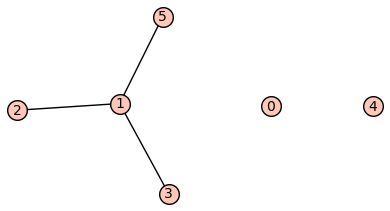

Trenutni premer: +Infinity
Dodana povezava: 0 - 4, novi premer: 3
Dodana povezava: 0 - 5, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 5)
Vse dodane povezave: [(0, 4), (0, 5)]


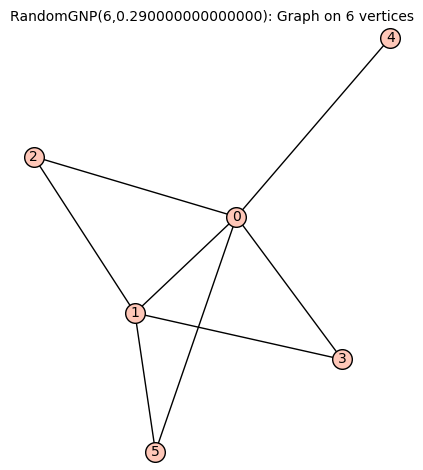

In [9]:
# izboljšan algoritem

def find_best_edge_to_reduce_diameter_izboljsan(G):
    # Izračun trenutnega premera
    initial_diameter = G.diameter()
    print(f"Trenutni premer: {initial_diameter}")
    
    # Poišče vse pare vozlišč brez povezave
    non_edges = [(u, v) for u in G.vertices() for v in G.vertices()
                 if u != v and not G.has_edge(u, v)]
    
    best_edge = None
    best_new_diameter = initial_diameter
    added_edges = []  # Ustvarimo seznam dodanih povezav
    
    while best_new_diameter > 2:  # Ustavimo postopek, ko dosežemo premer 2
        for u, v in non_edges:
          
            G.add_edge(u, v)
            new_diameter = G.diameter()
            
            if new_diameter < best_new_diameter:
                best_new_diameter = new_diameter
                best_edge = (u, v)
                
                # Dodamo povezavo v seznam
                added_edges.append((u, v))
                print(f"Dodana povezava: {u} - {v}, novi premer: {new_diameter}")
            
            # Če je premer 2, končamo postopek
            if best_new_diameter == 2:
                print(f"Premer je dosegel 2 z zadnjo dodano povezavo: {best_edge}")
                print(f"Vse dodane povezave: {added_edges}")
                return G  # Vrne končni graf z dodanimi povezavami

# preverimo delovanje algoritma najprej na majhnem grafu
graf_primer = graphs.RandomGNP(6, 0.29)
graf_primer.show()
find_best_edge_to_reduce_diameter_izboljsan(graf_primer)

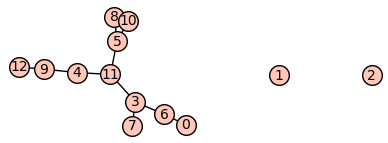

Trenutni premer: +Infinity
Dodana povezava: 0 - 2, novi premer: 7
Dodana povezava: 0 - 3, novi premer: 6
Dodana povezava: 0 - 4, novi premer: 5
Dodana povezava: 0 - 9, novi premer: 4
Dodana povezava: 0 - 10, novi premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 2), (0, 3), (0, 4), (0, 9), (0, 10), (0, 12)]


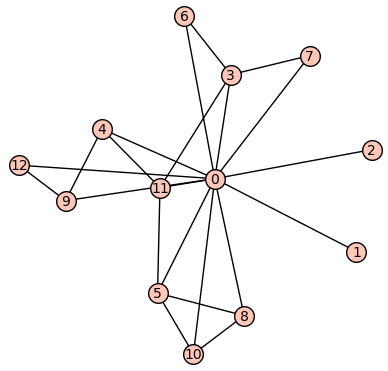

None


In [10]:
# preverimo še na enem grafu z 13 vozlišči

nakljucni_graf_13 = graphs.RandomGNP(13, 0.17)
nakljucni_graf_13.show()
graf_nov = find_best_edge_to_reduce_diameter_izboljsan(nakljucni_graf_13)
graf_nov.show()
print(SDCTD_stevilo(graf_nov))

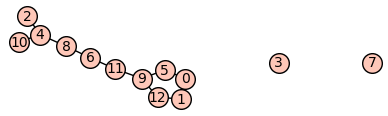

Trenutni premer: +Infinity
Dodana povezava: 0 - 7, novi premer: 4
Dodana povezava: 0 - 10, novi premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 7), (0, 10), (0, 12)]


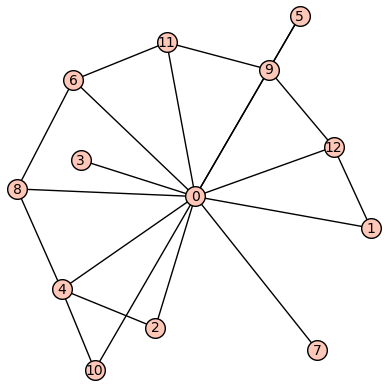

None


In [11]:
# vidimo, da je v takem primeru STCTD število enako 0. Ali lahko to posplošimo?
# poglejmo za še večji graf; recimo n = 15

nakljucni_graf_15 = graphs.RandomGNP(13, 0.17)
nakljucni_graf_15.show()
graf_nov2 = find_best_edge_to_reduce_diameter_izboljsan(nakljucni_graf_15)
graf_nov2.show()
print(SDCTD_stevilo(graf_nov2))



Trenutni premer: 2
Ni ok
Trenutni premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 12)]


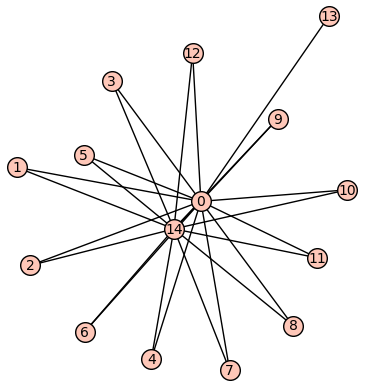

None
Trenutni premer: 2
Ni ok
Trenutni premer: 4
Dodana povezava: 0 - 1, novi premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 1), (0, 12)]


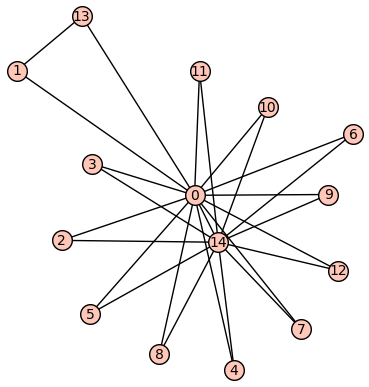

None
Trenutni premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 12)]


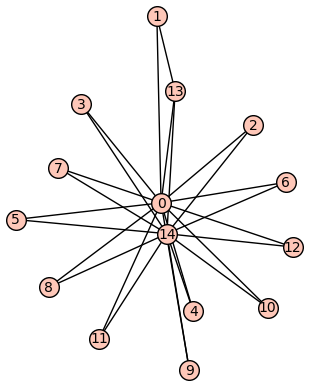

3
Trenutni premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 12)]


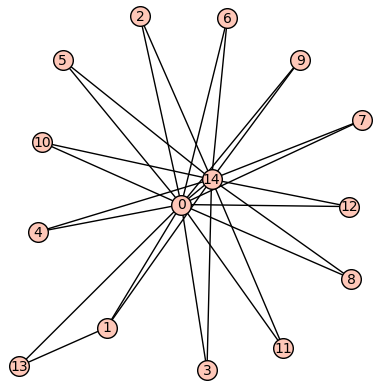

None
Trenutni premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 12)]


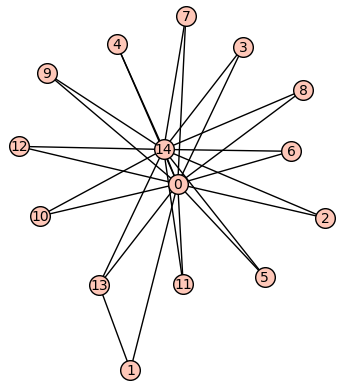

None
Trenutni premer: 2
Ni ok
Trenutni premer: 4
Dodana povezava: 0 - 2, novi premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 2), (0, 12)]


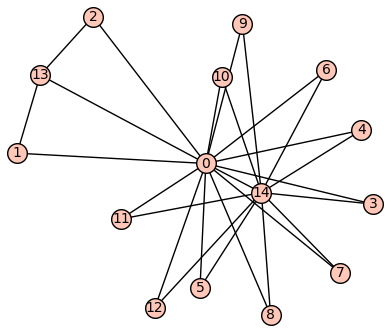

None
Trenutni premer: 3
Dodana povezava: 0 - 12, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 12)
Vse dodane povezave: [(0, 12)]


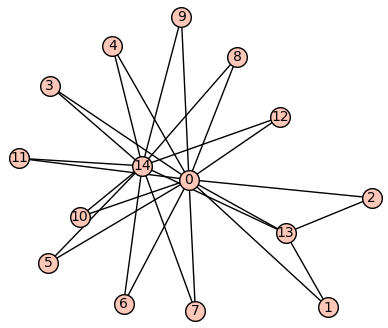

4


In [12]:
# preverimo recimo za 10 grafov na 15 vozliščih
vsi_grafi = []
count = 0
for G in graphs.nauty_geng('15 -c'):
    if count == 10:
        break
    vsi_grafi.append(G)
    count += 1
    
for g in vsi_grafi:
    if g is None:
        print("Ni ok.")
        continue
        
    result = find_best_edge_to_reduce_diameter_izboljsan(g)
   
    if result is not None:
        result.show() # ločimo
        print(SDCTD_stevilo(result))
    else:
        print("Ni ok")

Sledi: večino grafov s 15 vozlišči ima STCTD število enako 0 lahko pa je enako tudi 3 ali 4. Vsi grafi so med seboj zelo podobni; dve vozlišči sta povsod močno povezani z več drugimi. Spominja na obliko zvezdastega grafa. 

Če primerjamo prvi in tretji graf:  v prvem grafu so povezave vozlišča 0 bolj enakomerno razporejene med drugimi vozlišči. V prvem grafu je eno izmed vozlišč, ki je bilo prej povezano z vozliščem 13, povezano neposredno z vozliščem 0. Tretjii graf se bolj približa zvezdasti obliki z večjim številom neposrednih povezav med 0 in drugimi vozlišči. To bi bil ključen razlog za razliko v STCTD številu.



Trenutni premer: 2
Ni ok
Trenutni premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 15)]


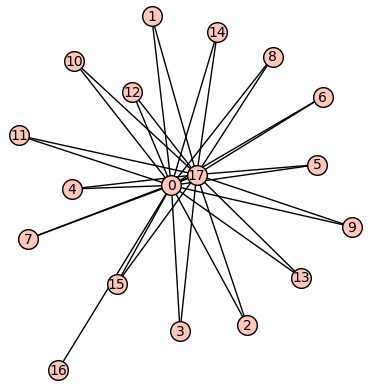

None
Trenutni premer: 2
Ni ok
Trenutni premer: 4
Dodana povezava: 0 - 1, novi premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 1), (0, 15)]


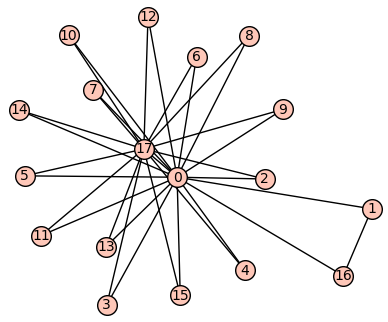

None
Trenutni premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 15)]


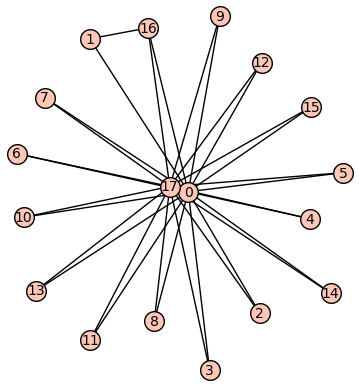

3
Trenutni premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 15)]


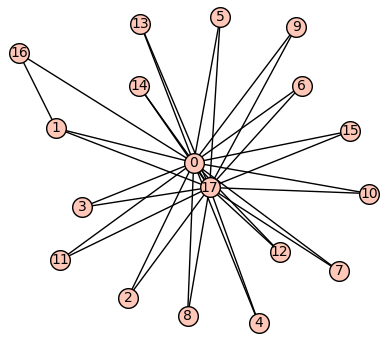

None
Trenutni premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 15)]


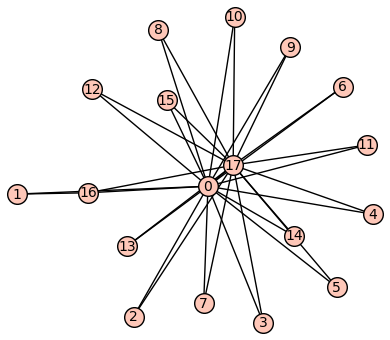

None
Trenutni premer: 2
Ni ok
Trenutni premer: 4
Dodana povezava: 0 - 2, novi premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 2), (0, 15)]


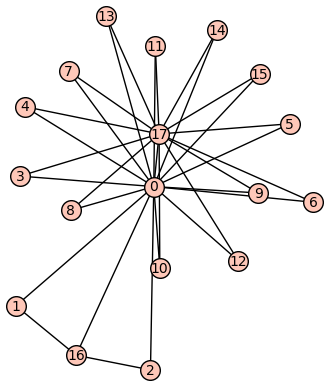

None
Trenutni premer: 3
Dodana povezava: 0 - 15, novi premer: 2
Premer je dosegel 2 z zadnjo dodano povezavo: (0, 15)
Vse dodane povezave: [(0, 15)]


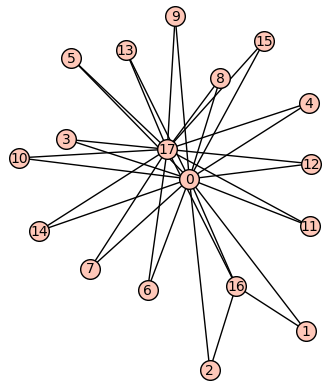

4


In [14]:
vsi_grafi_18 = []
count = 0
for G in graphs.nauty_geng('18 -c'):
    if count == 10:
        break
    vsi_grafi_18.append(G)
    count += 1
    
for g in vsi_grafi_18:
    if g is None:
        print("Ni ok.")
        continue
        
    result = find_best_edge_to_reduce_diameter_izboljsan(g)
   
    if result is not None:
        result.show() # ločimo
        print(SDCTD_stevilo(result))
    else:
        print("Ni ok")

Precej podobno opazimo tudi pri še večjih grafih, zato lahko posplošimo in zaključimo raziskovanje.

